# Лабораторная работа №2. Линейные модели для задач регрессии

В данной лабораторной работе рассматриваются задачи регрессии.
Частным случаем является задача линейной регрессии.
Используется следующая модель:
$$
y = \sum_{k=0}^{M-1} w_k \phi_k(\mathbf{x}) = \mathbf{w}^T \mathbf{\phi}(\mathbf{x}),
$$
где $\mathbf{\phi}(\mathbf{x}) = \left(1, \phi_1(\mathbf{x}), \dots, \phi_{M-1}(\mathbf{x})\right)^T$,
$\mathbf{w} = \left(w_0, w_1, \dots, w_{M-1}\right)^T$.

В данной работе в качестве функции штрафа используется средняя квадратичная ошибка:
$$
E_D(\mathbf{w}, \mathbf{T}) = \frac{1}{2} \sum_{n=1}^{N} \left( t_n - \mathbf{w}^T \mathbf{\phi}(\mathbf{x}_n) \right)^2.
$$

Решение задачи минимизации такого штрафа даёт параметры распознавателя
$$
\mathbf{w_{ML}} = \left(\mathbf{\Phi}^T \mathbf{\Phi}\right)^{-1} \mathbf{\Phi}^T \mathbf{T}.
$$

В случае добавления $L2$-регуляризации (гребневая регрессия) штраф:
$$
E(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^{N} \left( t_n - \mathbf{w}^T \mathbf{\phi}(\mathbf{x}_n) \right)^2 + \frac{\lambda}{2} \mathbf{w}^T \mathbf{w},
$$
МНК-решением будет
$$
\mathbf{w_{ML}} = \left(\mathbf{\Phi}^T \mathbf{\Phi} + \lambda \mathbf{E} \right)^{-1} \mathbf{\Phi}^T \mathbf{T}.
$$

In [1]:
import numpy as np
import sklearn as sk
from sklearn import datasets, model_selection, metrics
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.grid'] = True

## Задание №1

Реализуйте функцию, которая возвращает параметры модели, найденные с помощью метода наименьших квадратов.
Операция умножения в `numpy` - это `np.matmul` или `@`.
Перевод массива в тип матрица осуществляется с помощью `np.asmatrix`.
Транспонирование матрицы `x` - это операция `x.T`.
Получение из матрицы `x` линейный массив - это операция `x.A1`.

In [131]:
class LeastSquare:
    def __init__(self, x, y):
        x = (np.concatenate([[[1 for i in range(len((x.T)[0]))]], x.T])).T # ?? np.concatenate
        w = np.linalg.inv(x.T @ x) @ x.T @ y # ?? np.linalg.inv, a @ b, np.asmatrix(y)
        self.W = np.asmatrix(w)
        
    def __call__(self, x):
        x = (np.concatenate([[[1 for i in range(len((x.T)[0]))]], x.T])).T
        return np.asmatrix(self.W @ np.asmatrix(x.T)).A1 # ?? a @ b, a.A1

# Тестирование

test_x = np.array([[1, 1, 1], [2, 2**2, 2**3], [3, 3**2, 3**3], [4, 4**2, 4**3]])
lsm = LeastSquare(test_x, [-1, 1, 2, 3])
assert np.linalg.norm(lsm(test_x) - [-1, 1, 2, 3]) < 1e-9, 'Метод недостаточно точный'

## Задание №2

Сгенерируйте данные для регрессии.
Размер выборки определяется соотношением `100 + 50 * mod(<порядковый номер в группе (4)>, 5)`.
Разделите полученную выборку на обучающую и тестовую.
Размер тестовой выборки должен составлять 20% от размера изначальной выборки.

In [277]:
x, y = sk.datasets.make_regression(n_samples=300, n_features=1, noise=1.5, bias=13, random_state=125)
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size=0.2, random_state=25)
print(x_train.shape, y_train.shape, y_test.shape)

(240, 1) (240,) (60,)


Запустите МНК для сгенерированного датасета.
Постройте графики, на которых изображены истинные и предсказанные значения, для тестовой и обучающей выборки.
Приведите значения MSE-ошибки для обеих выборок на тестовой и обучающей части.
$$
MSE = \frac{1}{N} \sum_{n=0}^{N-1} \left( t_n - y_n \right)^2.
$$
Сравните ошибки на обучающей и тестовой выборках, сделайте выводы.

Ошибка на обучающей выборке 2.107499138157016
Ошибка на тестовой выборке 2.7242353705399704


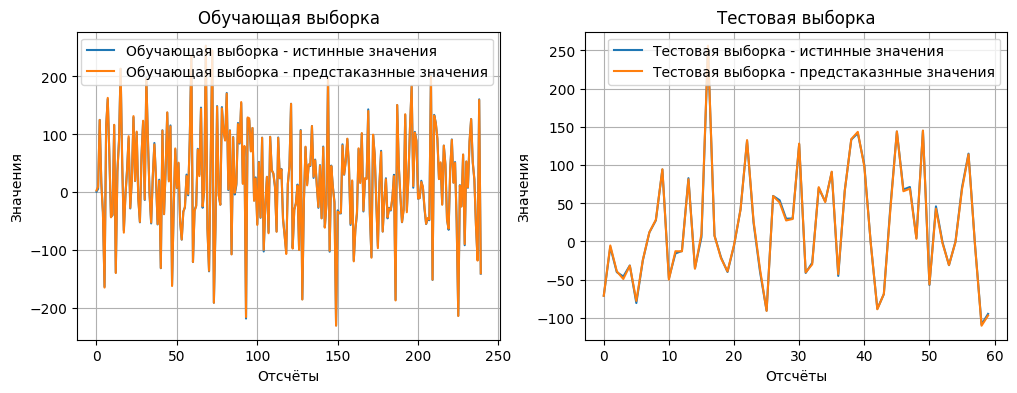

In [278]:
regressor = LeastSquare(x_train, y_train)

ry_train, ry_test = regressor(x_train), regressor(x_test)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(2*6, 4))

ax0.plot(range(len(y_train)), y_train, label='Обучающая выборка - истинные значения')
ax0.plot(range(len(ry_train)), ry_train, label='Обучающая выборка - предстаказнные значения')
ax0.set(xlabel='Отсчёты', ylabel='Значения', title='Обучающая выборка')
ax0.legend()

ax1.plot(range(len(y_test)), y_test, label='Тестовая выборка - истинные значения')
ax1.plot(range(len(ry_test)), ry_test, label='Тестовая выборка - предстаказнные значения')
ax1.set(xlabel='Отсчёты', ylabel='Значения', title='Тестовая выборка')
ax1.legend()

print('Ошибка на обучающей выборке', sk.metrics.mean_squared_error(y_train, ry_train))# ??? sk.metrics.mean_squared_error)
print('Ошибка на тестовой выборке', sk.metrics.mean_squared_error(y_test, ry_test))

## Задание №3

Реализуйте функцию, вычисляющую веса $w$ методом градиентного спуска:
$$
\mathbf{w}_{i+1} = \mathbf{w}_i - \eta \nabla E (\mathbf{w}_i, T),\; i = 1,2,\dots , \\
E(w) = \frac{1}{2} \sum_{n=0}^{N-1} \left( t_n - \mathbf{w}^T\mathbf{\phi}(\mathbf{x}_n) \right)^2, \\
\nabla E(\mathbf{w}) = \mathbf{\Phi}^T(\mathbf{\Phi}\mathbf{w} - \mathbf{T}).
$$
c условием выхода:
$$
| E_i - E_{i-1} | < \varepsilon \; \mathrm{или} \; N_{iter} \ge N_{max},
$$
где $N_{iter}$ $-$ номер итерации.
Здесь полагаем, что $\mathbf{\phi}(\mathbf{x}) = \mathbf{x}$.

In [179]:
class GradientDescent:
    def __init__(self, x, y, eta=1e-3, eps=1e-6, n_iter=5000):
        self.eta, self.eps, self.n_iter = eta, eps, n_iter
        
        
        x = (np.concatenate([[[1 for i in range(len((x.T)[0]))]], x.T])).T # ?? np.concatenate
        self.w = np.random.uniform(-1, 1, (1, len(x[0])))

        eprev = 0
        self.last_iter = 0
        y = np.expand_dims(y, axis=0)

        while(True):
            self.last_iter += 1

            e = sk.metrics.mean_squared_error(y, self.w @ x.T) * len(self.w[0]) / 2
            if abs(eprev - e) < self.eps or self.last_iter > self.n_iter:
                break
            eprev = e

            self.w = self.w - self.eta * (x.T @ (x @ self.w.T - y.T)).T
        
        self.last_error, self.last_error_delta = e, abs(eprev - e)
        
    def __call__(self, x):
        x = (np.concatenate([[[1 for i in range(len((x.T)[0]))]], x.T])).T
        return np.asmatrix(self.w @ np.asmatrix(x.T)).A1 # ??? reshape(-1)

# Тестирование

test_x = np.array([[0, 1, 2], [3, 4, 5]])
gd = GradientDescent(test_x, np.array([-1, 1]))
assert np.linalg.norm(gd(test_x) - [-1, 1]) < 1, 'Метод недостаточно точный'


Запустите полученную модель для датасета.
Сравните ошибки на выборках, полученные методом градиентного спуска.
Выведите количество итераций, за которое модель достигла нужной точности.

**Замечание**.
Чтобы добиться приемлемых результатов (малого значения MSE), возможно, потребуется подобрать подходящие параметры шага градиентного спуска $\eta$ и максимального количества итераций. Для начала возьмите:

* $w_0 = \left( {w_0}_0, {w_0}_1, \dots, {w_0}_{n-1} \right)$, где каждая компонента ${w_0}_i$ распределена равномерно на отрезке $[-1, 1]$;
* $\eta = 10^{-3}$; 
* $\varepsilon = 10^{-6}$;
* $N_{max} = 5000$.

Ошибка на обучающей выборке 2.1075004922413916
Ошибка на тестовой выборке 2.7239567721277287
Статистика: 42 2.1075004922413916 9.407565881858204e-07


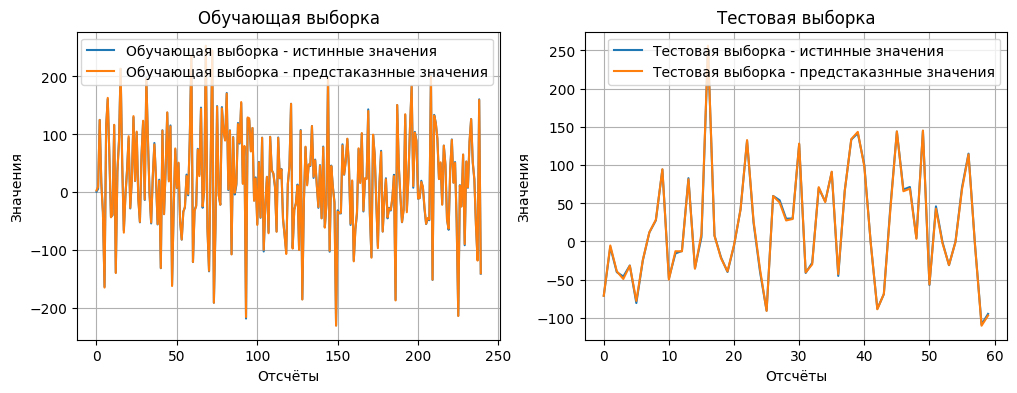

In [209]:
regressor_gd = GradientDescent(x_train, y_train, eta=0.001)
ry_train, ry_test = regressor_gd(x_train), regressor_gd(x_test)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(2*6, 4))

ax0.plot(range(len(y_train)), y_train, label='Обучающая выборка - истинные значения')
ax0.plot(range(len(ry_train)), ry_train, label='Обучающая выборка - предстаказнные значения')
ax0.set(xlabel='Отсчёты', ylabel='Значения', title='Обучающая выборка')
ax0.legend()

ax1.plot(range(len(y_test)), y_test, label='Тестовая выборка - истинные значения')
ax1.plot(range(len(ry_test)), ry_test, label='Тестовая выборка - предстаказнные значения')
ax1.set(xlabel='Отсчёты', ylabel='Значения', title='Тестовая выборка')
ax1.legend()

print('Ошибка на обучающей выборке', sk.metrics.mean_squared_error(y_train, ry_train))# ??? sk.metrics.mean_squared_error)
print('Ошибка на тестовой выборке', sk.metrics.mean_squared_error(y_test, ry_test))

print('Статистика:', regressor_gd.last_iter, regressor_gd.last_error, regressor_gd.last_error_delta)

**Вопросы**:

1. Стали ли результаты лучше метода наименьших квадратов из предыдущего пункта?
1. Как параметр $\eta$ влияет на количество итераций?
1. Найдите примерное значение $\eta$, после которого метод расходится (ошибка возрастает, а не уменьшается)?

**Ответы:**

1. Ошибка на обучающей выборка стала больше (разоичия в 4-ом знаке), на тестовой - меньше (разлиичие в 3-ем знаке), что можно считать улучшением.
2. Нельзя сказать точно уменьшится или увелчится, так как скорость работы метода градиентного спуска полностью завивит от условий задачи и от начальных условий.
3. Бинарным поиском примерное значение 0,0077.

## Задание №4

Сгенерируйте датасет с нелинейными данными:

* $x$ - это вектор из 15 элементов, значения которого распределены равномерно на интервале $[-1; 1]$;
* $y$ - это синусоида от значений $x$, смещенных на $0.7$, к которой прибавлен шум в виде нормального распределения $N(0.1, 0.2)$;
* выделите из полученных данных обучающую и тестовую выборки.
Размер тестовой выборки составляет 20%.

(12, 1) (12,)


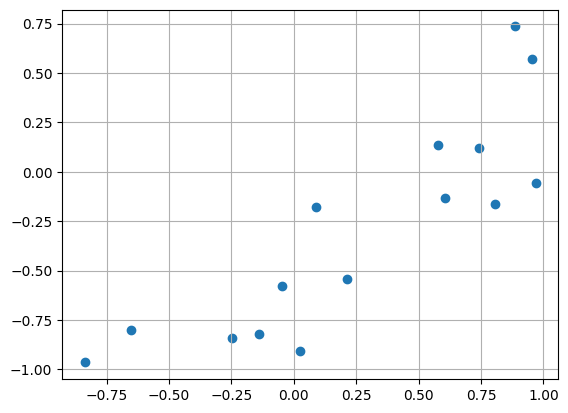

In [218]:
rng = np.random.default_rng(seed=4)
x = rng.uniform(-1, 1, (15, 1))
y = np.reshape(np.sin(x - 0.7) + rng.normal(0.1, 0.2, x.shape), -1)
plt.scatter(x, y)

x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size=0.2, random_state=43)
print(x_train.shape, y_train.shape)

Примените один из предыдущих методов на полученном датасете.
Постройте гистограмму ошибок предсказания, полученных на обучающих и тестовых данных.
Дайте оценку качеству предсказания, оценивая его по величине MSE.

Ошибка на обучающей выборке: 0.07630550399509749
Ошибка на тестовой выборке: 0.06463548592930747


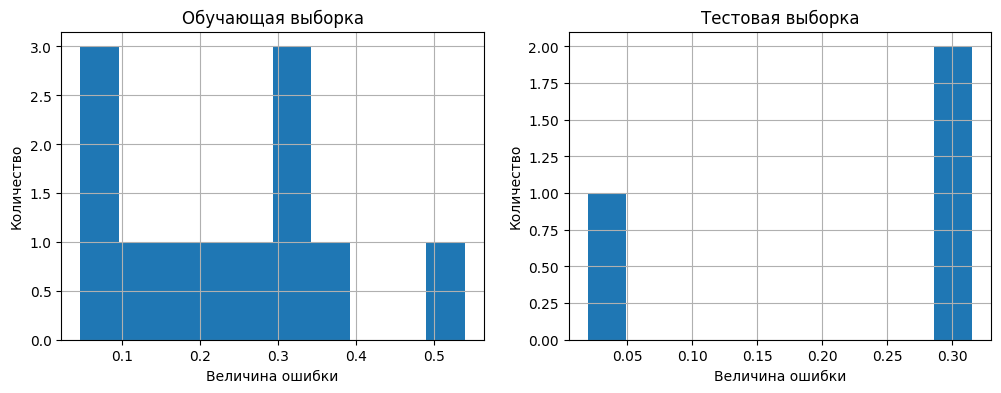

In [219]:
regressor = GradientDescent(x_train, y_train)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(2*6, 4))

ax0.hist(abs(regressor(x_train) - y_train))
ax0.set(xlabel='Величина ошибки', ylabel='Количество', title='Обучающая выборка')
ax1.hist(abs(regressor(x_test) - y_test))
ax1.set(xlabel='Величина ошибки', ylabel='Количество', title='Тестовая выборка')

print('Ошибка на обучающей выборке:', sk.metrics.mean_squared_error(y_train, regressor(x_train)))
print('Ошибка на тестовой выборке:', sk.metrics.mean_squared_error(y_test, regressor(x_test)))

## Задание №5

Создайте функцию-декоратор для добавления степенной зависимости в произвольную модель регрессии.

In [250]:
def PolyDecorator(clazz, *args, **kwargs):
    class PolyDecoratorClass(clazz):
        def __init__(self, p, x, *args):
            super().__init__(PolyDecoratorClass.poly(x, p), *args)
            self.p = p
        
        def __call__(self, x):
            return super().__call__(PolyDecoratorClass.poly(x, self.p))
        
        @staticmethod
        def poly(x, k):
            return np.concatenate([x ** p for p in range(1, k + 1)], axis=1)

    return PolyDecoratorClass(*args, **kwargs)


Попробуйте улучшить результат для датасета.
Используйте модель
$$
y_{pred} = w_0 + w_1 x + w_2 x^2 + \dots + w_p x^p.
$$

Рассмотрите полиномы порядков $p$ от 1 до 9.

Как порядок влияет на качество?
Чтобы ответить на этот вопрос, нужно привести значения MSE для обучающей и тестовой выборок в виде графика
(зависимость MSE-ошибки $E$ от порядка полинома $p$).
Выберите наилучшую модель.

Порядок:  1 ,ошибка на обучающей выборке: 0.07630618052125011
Порядок:  1 ,ошибка на тестовой выборке: 0.06461968868033281 

Порядок:  2 ,ошибка на обучающей выборке: 0.05795238628077201
Порядок:  2 ,ошибка на тестовой выборке: 0.09260849846038528 

Порядок:  3 ,ошибка на обучающей выборке: 0.05811083101551746
Порядок:  3 ,ошибка на тестовой выборке: 0.09434031218359491 

Порядок:  4 ,ошибка на обучающей выборке: 0.05463844987362343
Порядок:  4 ,ошибка на тестовой выборке: 0.10263956935732928 

Порядок:  5 ,ошибка на обучающей выборке: 0.05524315638440295
Порядок:  5 ,ошибка на тестовой выборке: 0.11116176168994578 

Порядок:  6 ,ошибка на обучающей выборке: 0.0575784836305183
Порядок:  6 ,ошибка на тестовой выборке: 0.11384779156803902 

Порядок:  7 ,ошибка на обучающей выборке: 0.05693963371825168
Порядок:  7 ,ошибка на тестовой выборке: 0.11803741139180068 

Порядок:  8 ,ошибка на обучающей выборке: 0.055799944040450494
Порядок:  8 ,ошибка на тестовой выборке: 0.11768919903785556 



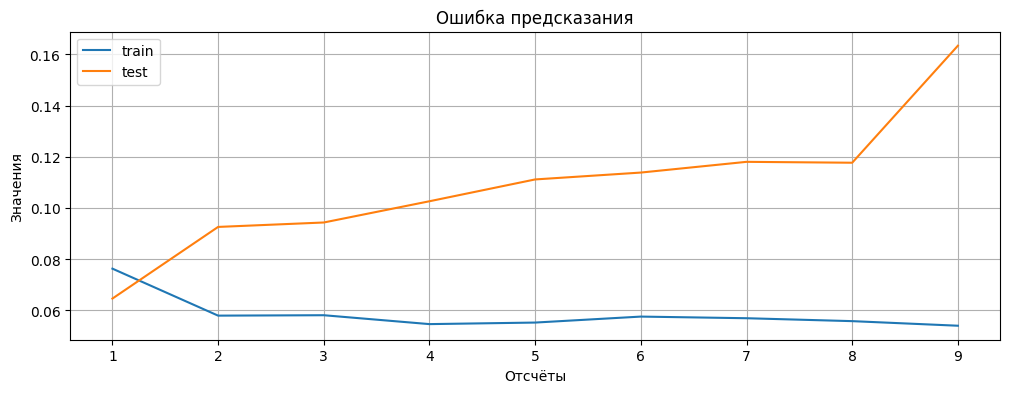

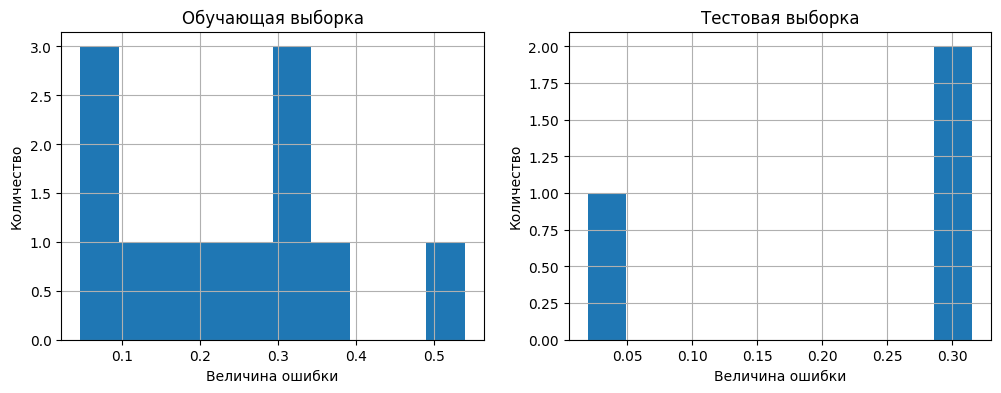

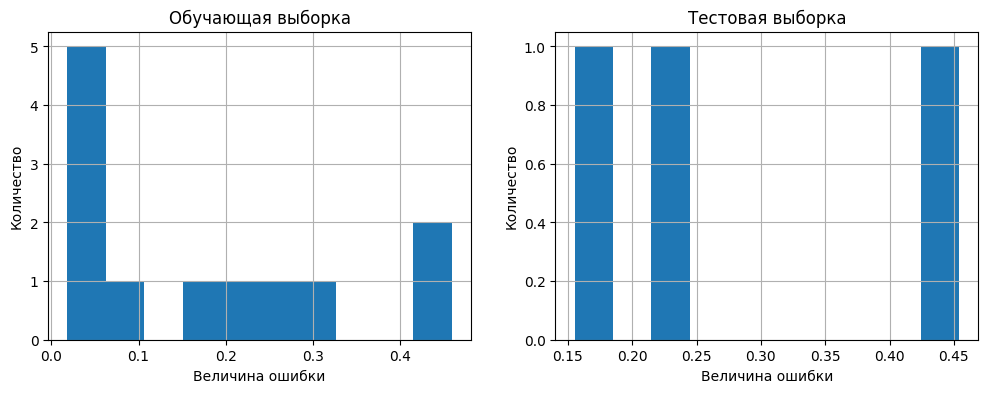

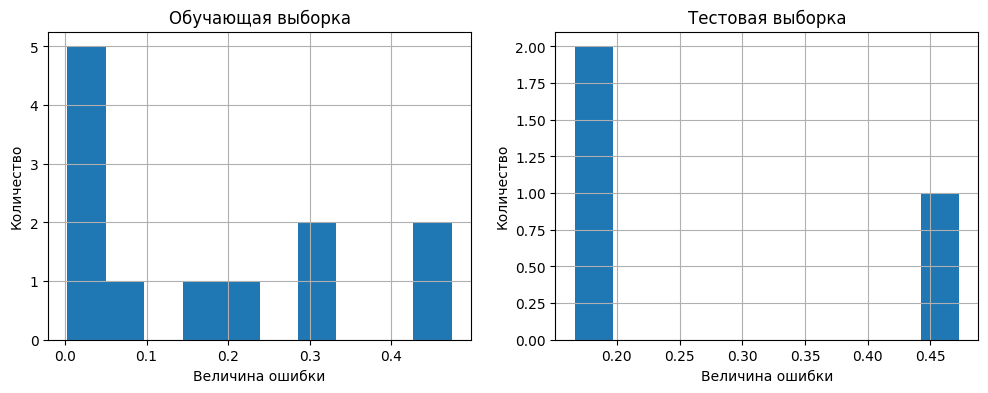

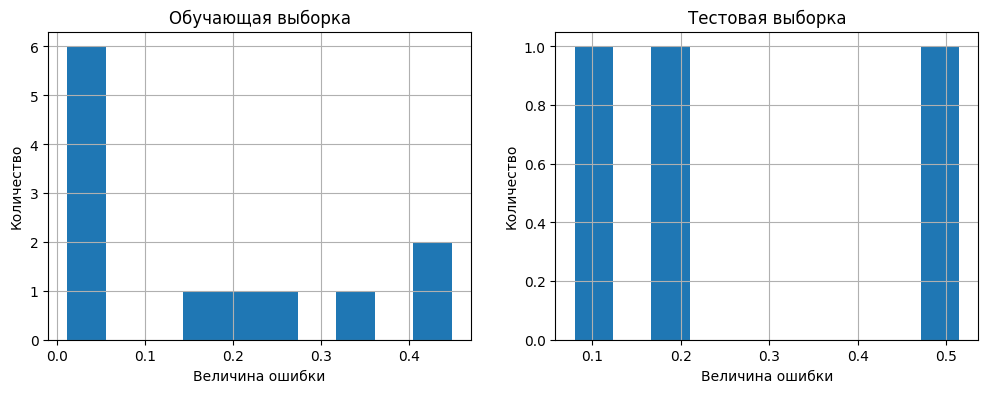

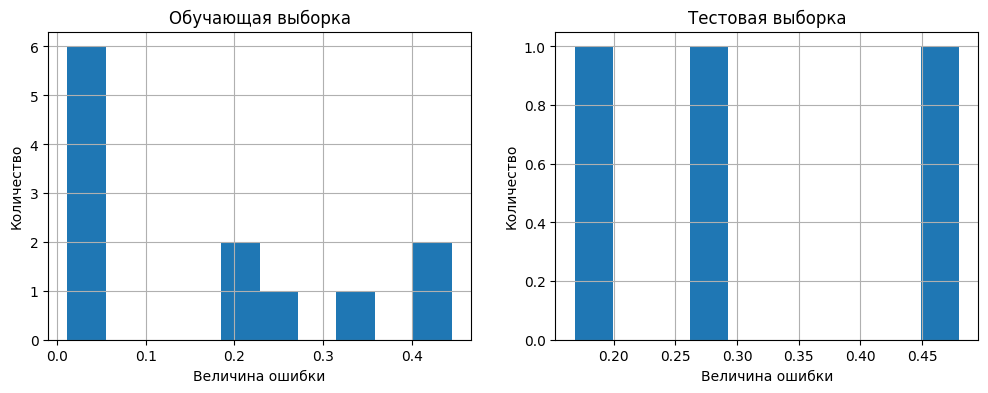

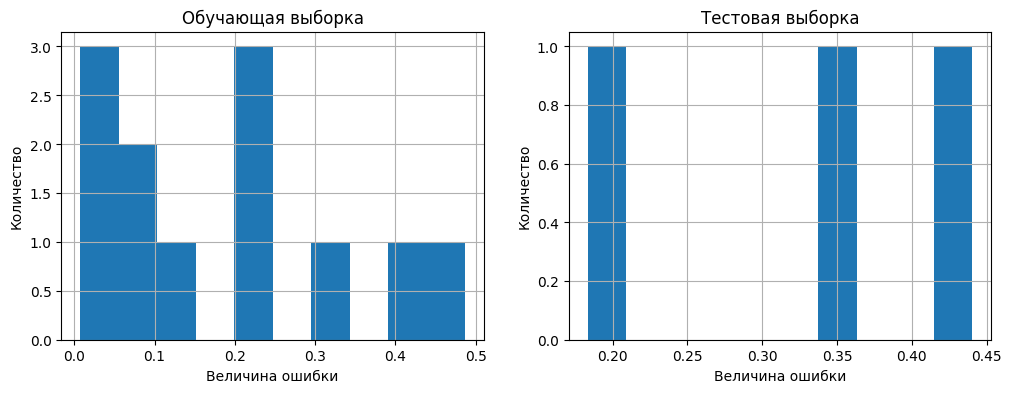

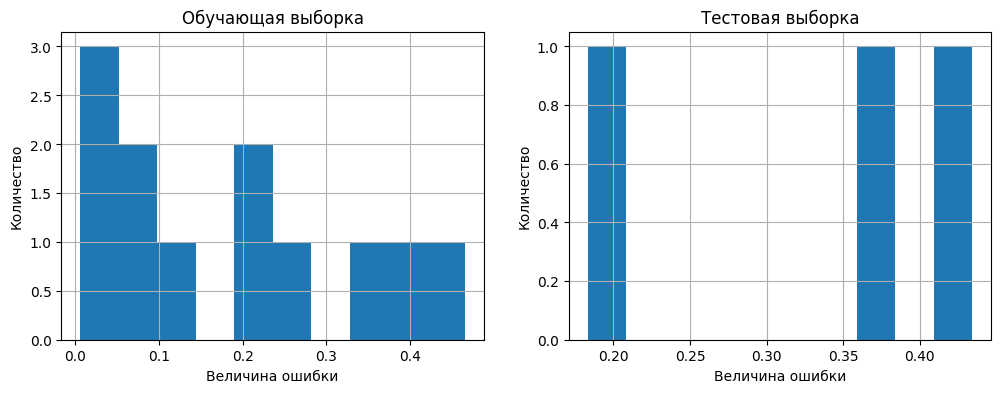

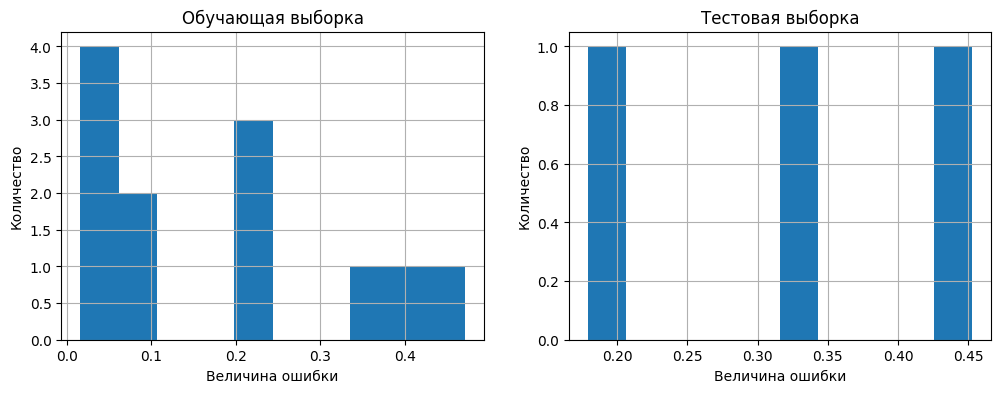

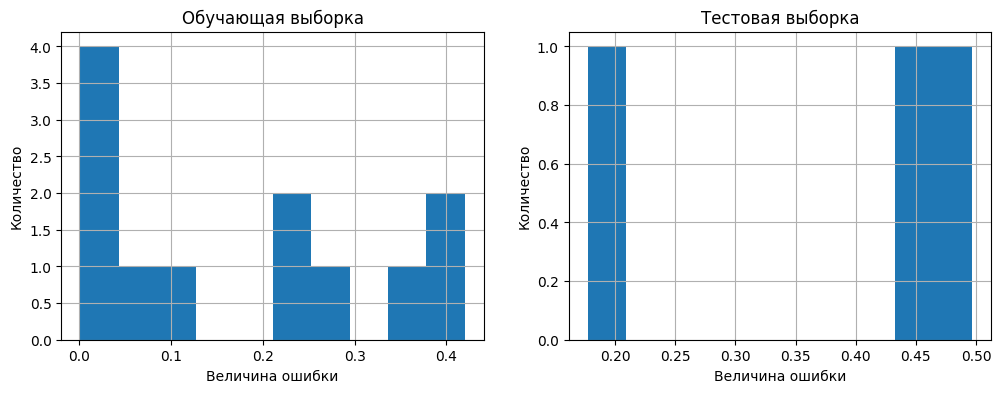

In [259]:
powers = np.arange(1, 10)
train_err, test_err, regr = [], [], []
for p in powers:
    regressor = PolyDecorator(GradientDescent, p, x_train, y_train)
    train_err.append(sk.metrics.mean_squared_error(y_train, regressor(x_train)))
    test_err.append(sk.metrics.mean_squared_error(y_test, regressor(x_test)))
    regr.append([regressor(x_train), regressor(x_test)])

fig, ax = plt.subplots(1, 1, figsize=(2*6, 4))
ax.plot(powers, train_err, label='train')
ax.plot(powers, test_err, label='test')
ax.set(xlabel='Отсчёты', ylabel='Значения', title='Ошибка предсказания')
ax.legend()

for p in (powers - 1): # k = ??? test_err
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(2*6, 4))

    ax0.hist(abs(regr[p][0] - y_train)) # ax0.hist(???)
    ax0.set(xlabel='Величина ошибки', ylabel='Количество', title='Обучающая выборка')
    ax1.hist(abs(regr[p][1] - y_test))
    ax1.set(xlabel='Величина ошибки', ylabel='Количество', title='Тестовая выборка')

    print('Порядок: ', p + 1, ',ошибка на обучающей выборке:', sk.metrics.mean_squared_error(y_train, regr[p][0])) # print(f"Порядок: {???}, ошибка на тестовой выборке: {???}")
    print('Порядок: ', p + 1, ',ошибка на тестовой выборке:', sk.metrics.mean_squared_error(y_test, regr[p][1]), '\n')

**Вопросы:**

1. Удалось ли с полиномиальной регрессией достичь лучших результатов, чем с линейной регрессией?

**Ответы:**

1. Да, но присутсвует переобучение модели при некоторых степенях.

## Задание №6

Добавьте $L2$-регуляризацию для модели из пункта 5
$$
E_r = \frac{1}{2} \sum_{n=0}^{N-1} \left( t_n - \mathbf{w}^T \mathbf{\phi}(\mathbf{x}_n) \right)^2 + \frac{\lambda}{2} \mathbf{w}^T \mathbf{w}.
$$

Для этого отнаследуйтесь от регрессора и переопределите его конструктор.

In [265]:
class LeastSquareMod(LeastSquare):
    def __init__(self, x, y, alpha):
        x = (np.concatenate([[[1 for i in range(len((x.T)[0]))]], x.T])).T 
        w = np.linalg.inv(x.T @ x + alpha * np.eye(len(x[0]))) @ x.T @ y
        self.W = np.asmatrix(w)

In [264]:
print(np.eye(3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Подберите параметр регуляризации.
Для этого постройте heat-карту, показывающую значение MSE в зависимости от порядка полинома $p$ и значения параметра регуляризации $\lambda$.

Порядок:  2 , параметр alpha: 1e-06 , ошибка на обучающей выборке: 0.057546897734489184
Порядок:  2 , параметр alpha: 1e-06 , ошибка на тестовой выборке: 0.09908710788908913 

Порядок:  2 , параметр alpha: 1.3894954943731361e-05 , ошибка на обучающей выборке: 0.057546897743040885
Порядок:  2 , параметр alpha: 1.3894954943731361e-05 , ошибка на тестовой выборке: 0.0990850635422405 

Порядок:  2 , параметр alpha: 0.00019306977288832496 , ошибка на обучающей выборке: 0.057546899393752037
Порядок:  2 , параметр alpha: 0.00019306977288832496 , ошибка на тестовой выборке: 0.09905666310230636 

Порядок:  2 , параметр alpha: 0.0026826957952797246 , ошибка на обучающей выборке: 0.05754721711713092
Порядок:  2 , параметр alpha: 0.0026826957952797246 , ошибка на тестовой выборке: 0.09866313171833498 

Порядок:  2 , параметр alpha: 0.03727593720314938 , ошибка на обучающей выборке: 0.05760605874357024
Порядок:  2 , параметр alpha: 0.03727593720314938 , ошибка на тестовой выборке: 0.093398662414746

C:\Users\1\AppData\Local\Temp\ipykernel_13332\1088898099.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(2*6, 4))


Порядок:  4 , параметр alpha: 7.196856730011514 , ошибка на обучающей выборке: 0.18787936415776688
Порядок:  4 , параметр alpha: 7.196856730011514 , ошибка на тестовой выборке: 0.09749152760670492 

Порядок:  4 , параметр alpha: 100.0 , ошибка на обучающей выборке: 0.3420469414622049
Порядок:  4 , параметр alpha: 100.0 , ошибка на тестовой выборке: 0.3001284801724635 

Порядок:  5 , параметр alpha: 1e-06 , ошибка на обучающей выборке: 0.05230649174348715
Порядок:  5 , параметр alpha: 1e-06 , ошибка на тестовой выборке: 0.13678708496223954 

Порядок:  5 , параметр alpha: 1.3894954943731361e-05 , ошибка на обучающей выборке: 0.052306623399674325
Порядок:  5 , параметр alpha: 1.3894954943731361e-05 , ошибка на тестовой выборке: 0.13619457404538923 

Порядок:  5 , параметр alpha: 0.00019306977288832496 , ошибка на обучающей выборке: 0.05232342496338196
Порядок:  5 , параметр alpha: 0.00019306977288832496 , ошибка на тестовой выборке: 0.1303881374421845 

Порядок:  5 , параметр alpha: 0.002

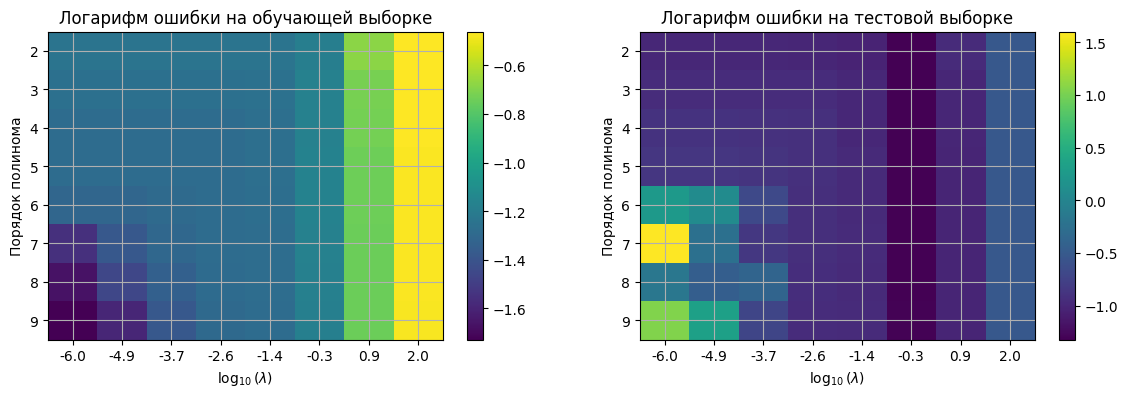

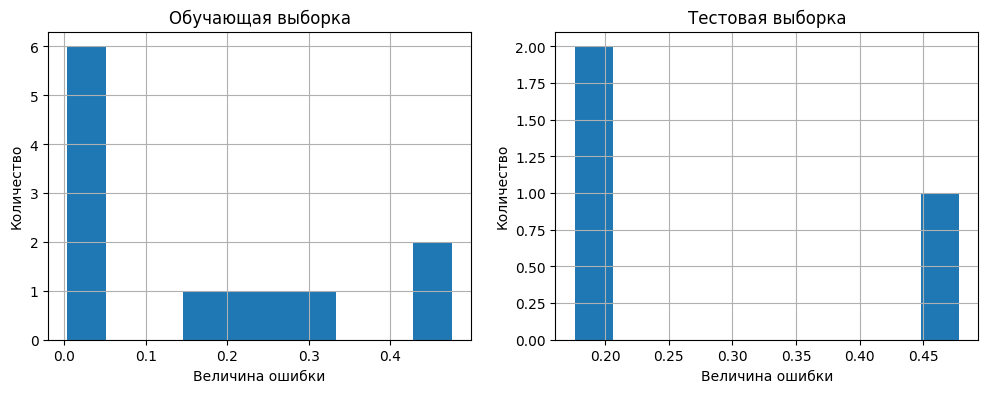

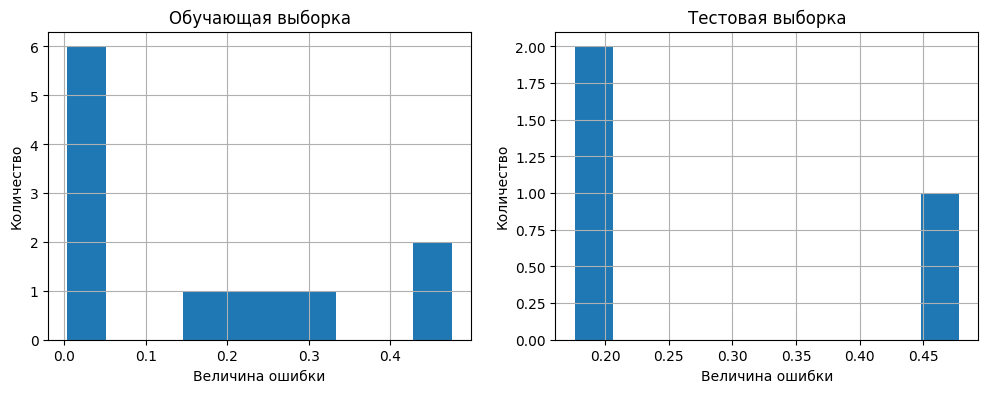

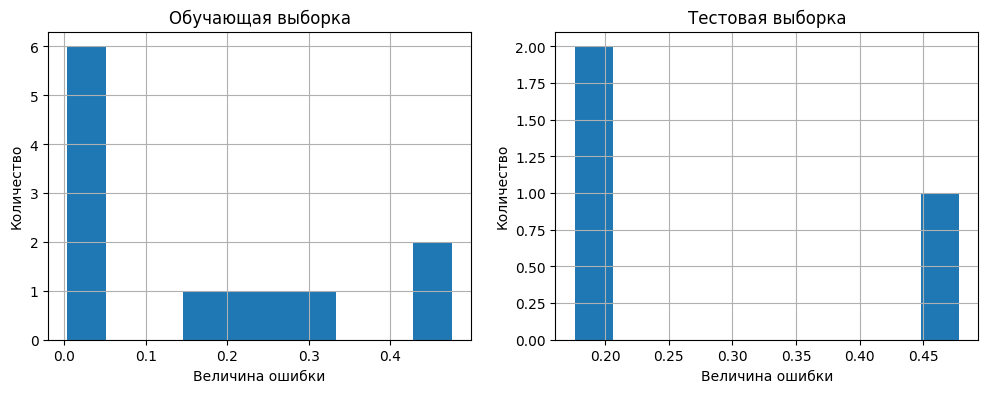

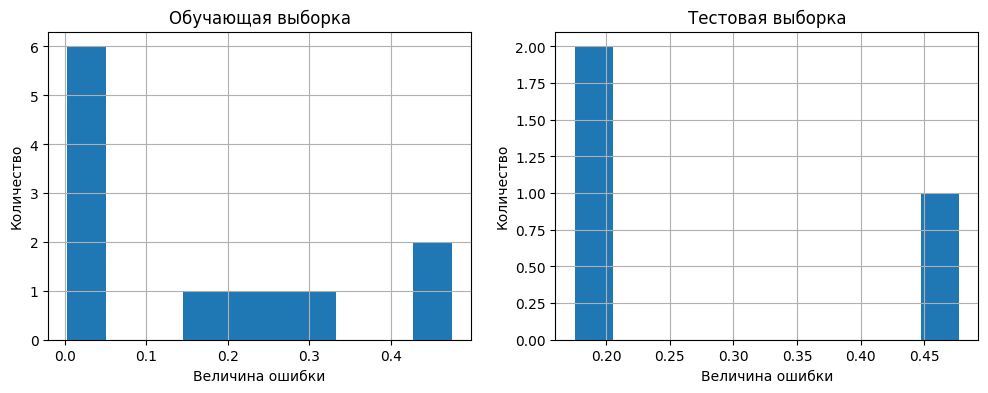

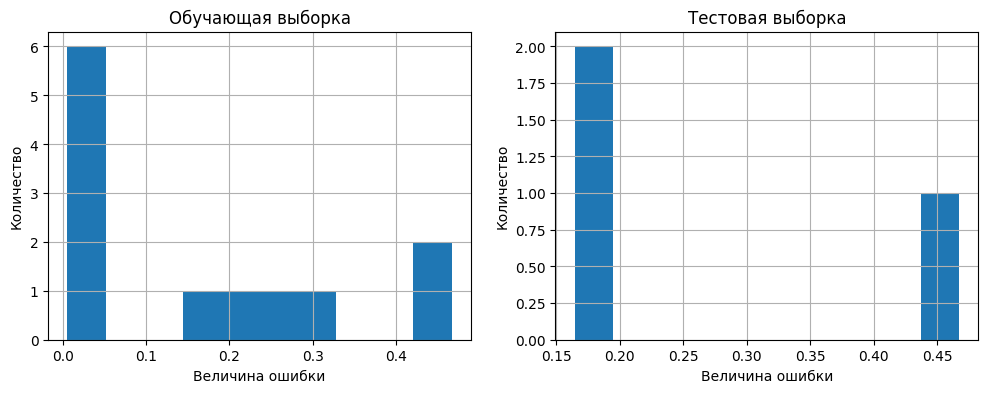

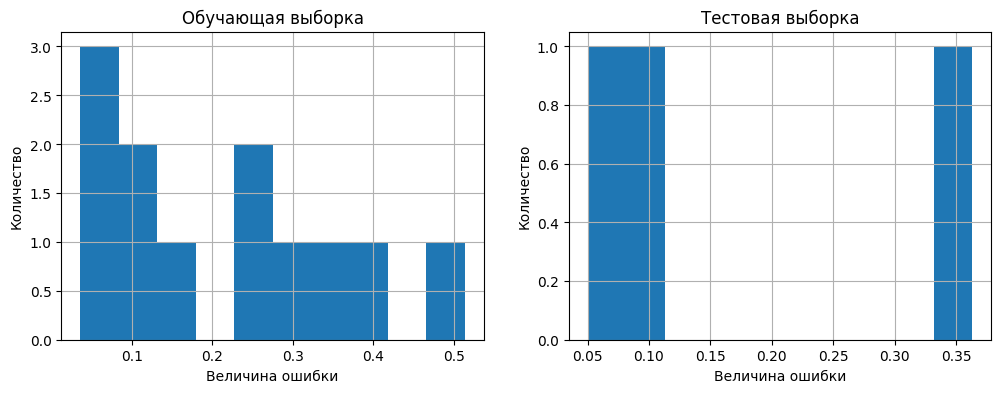

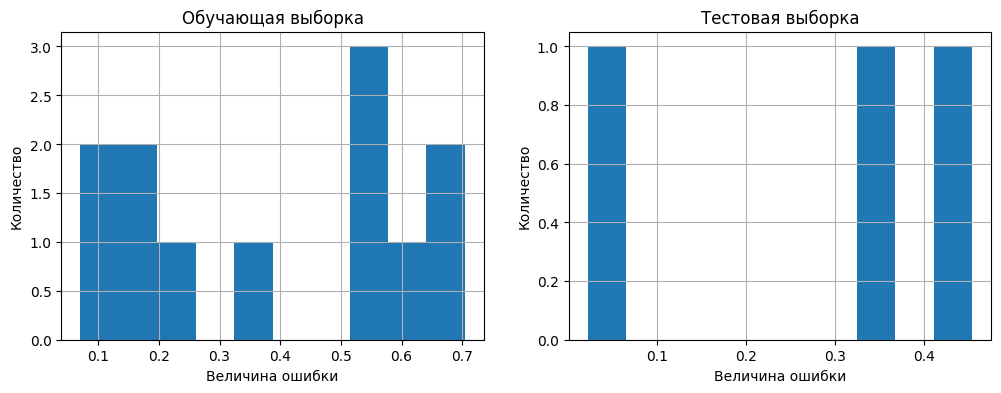

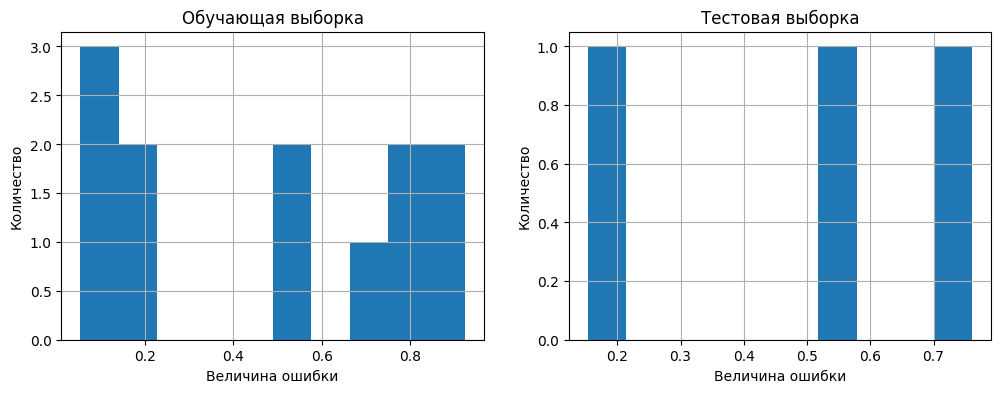

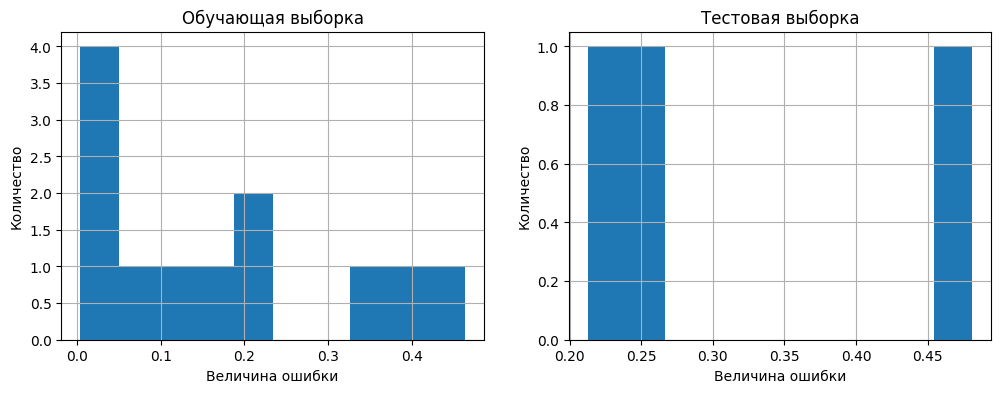

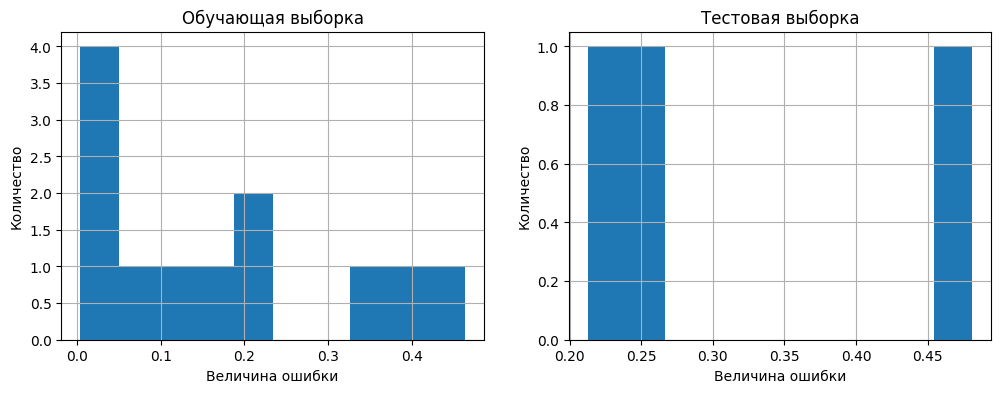

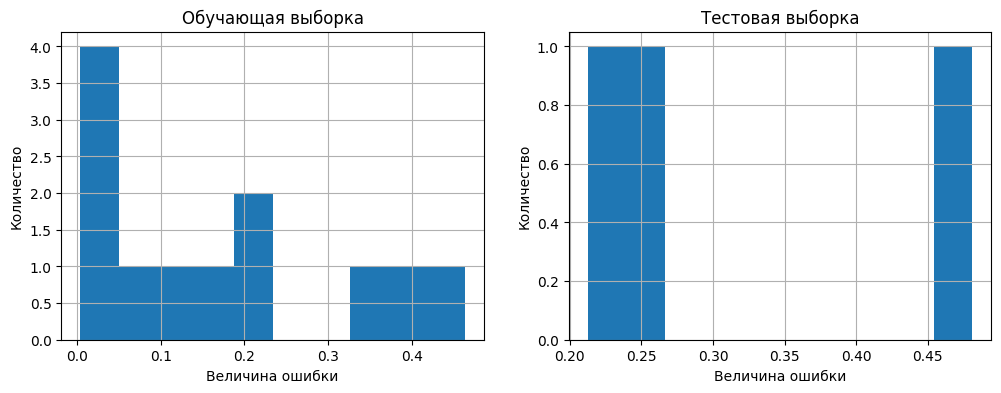

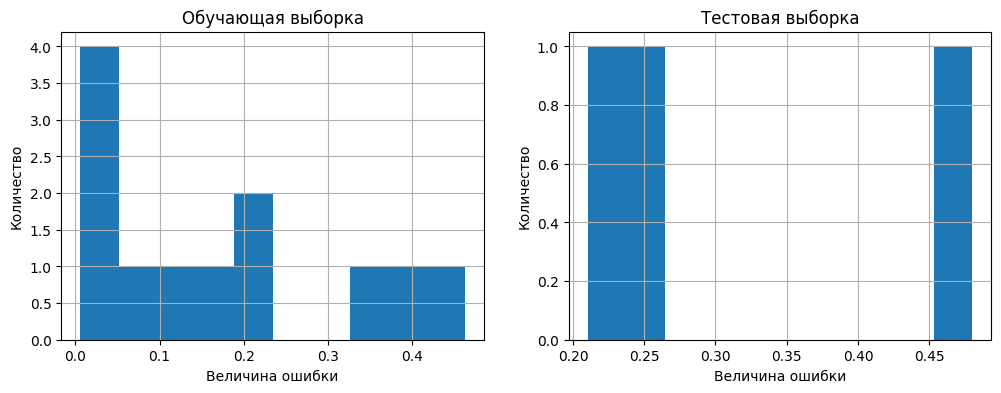

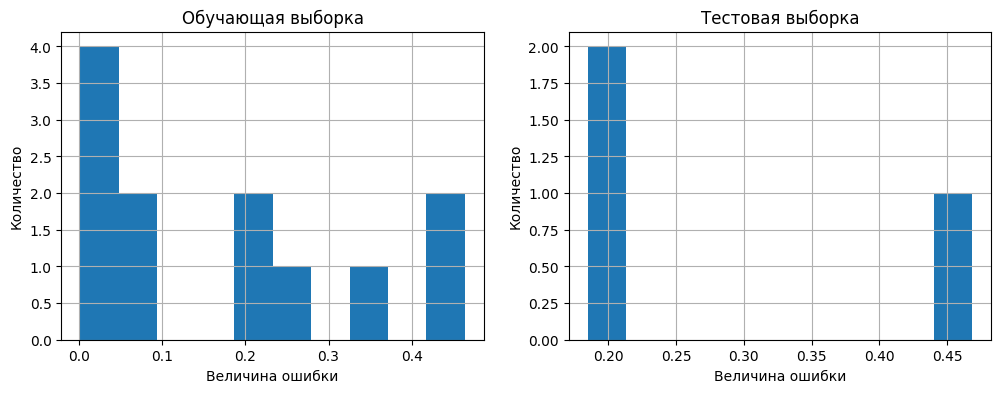

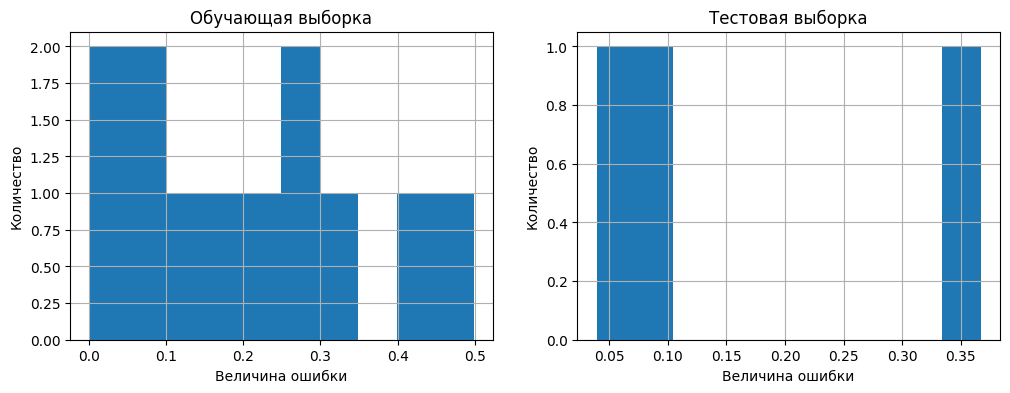

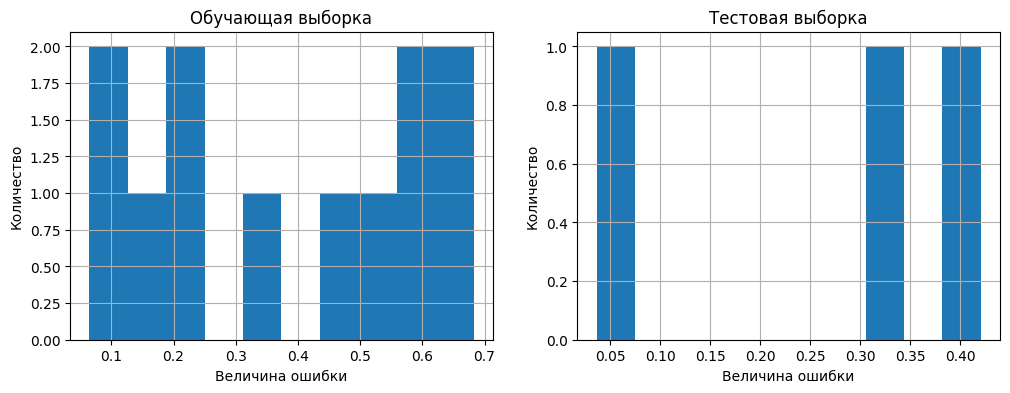

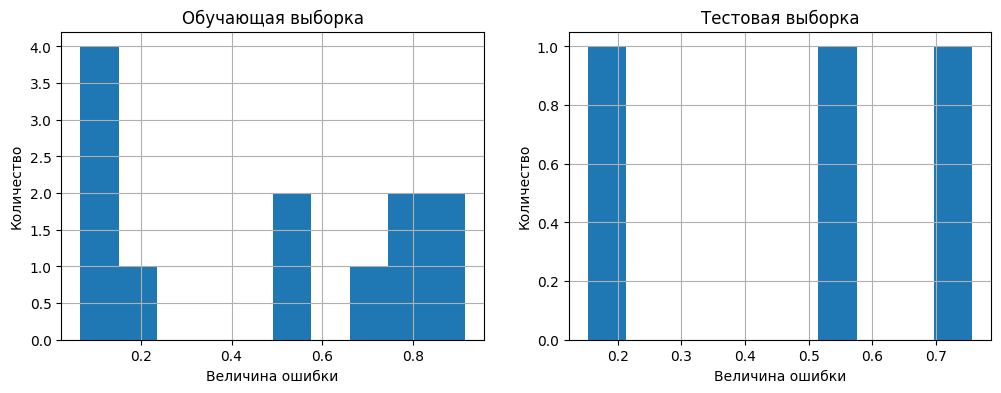

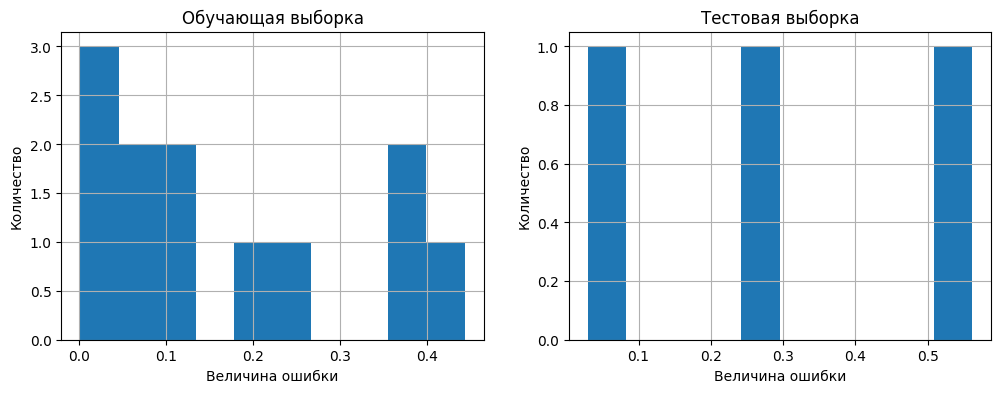

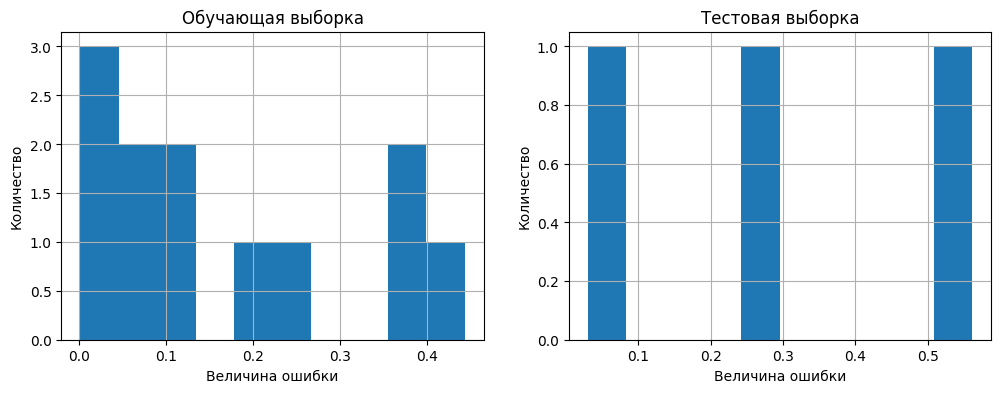

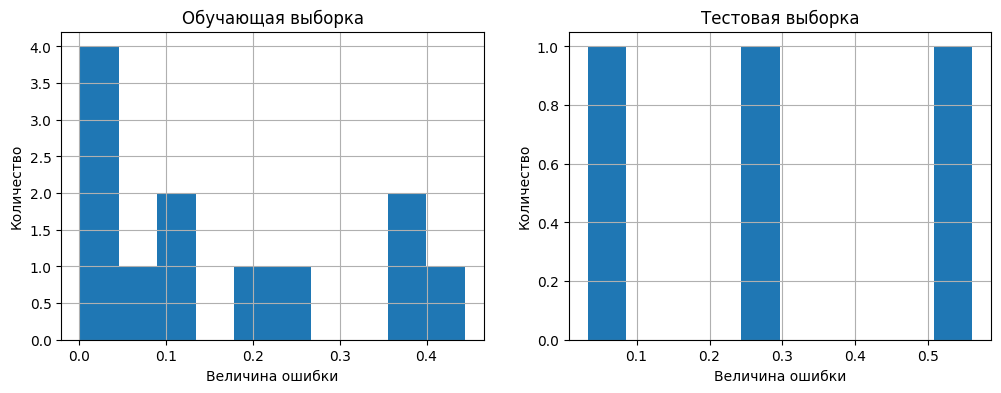

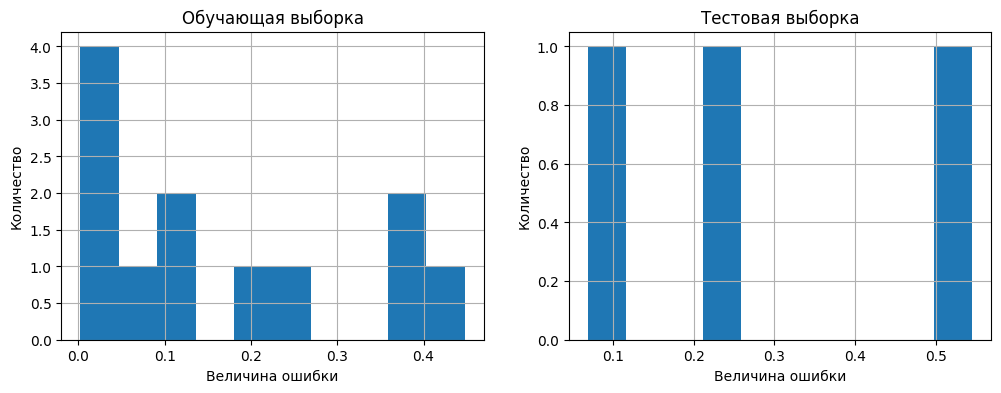

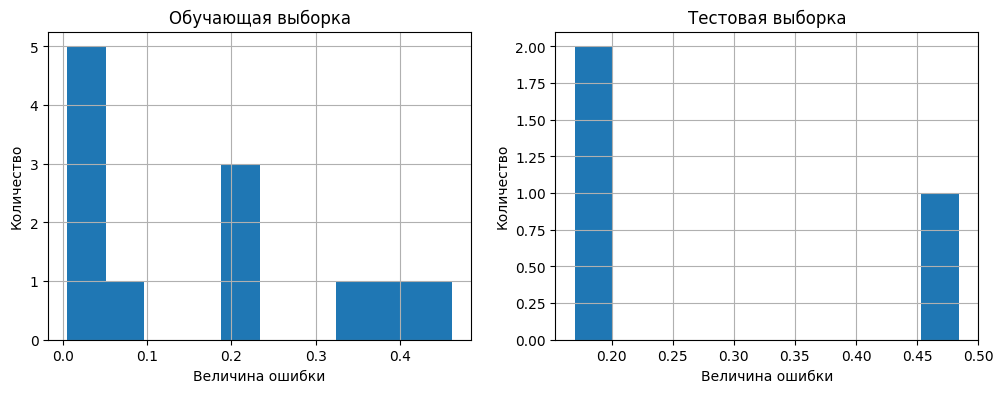

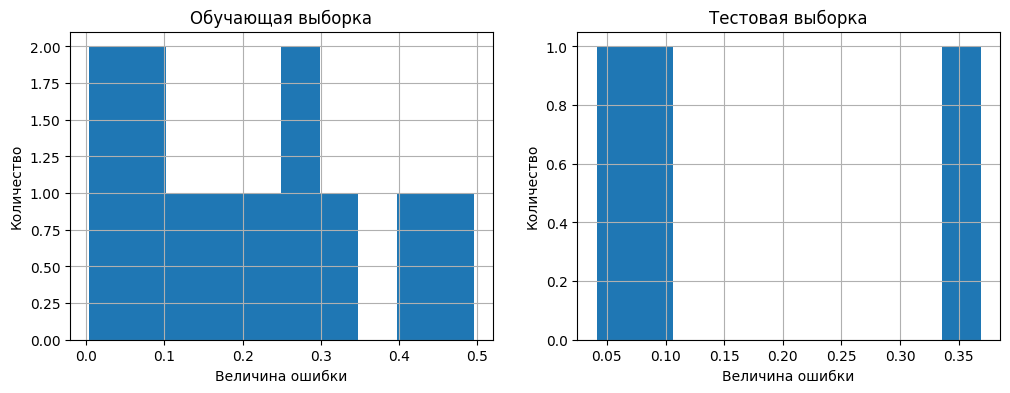

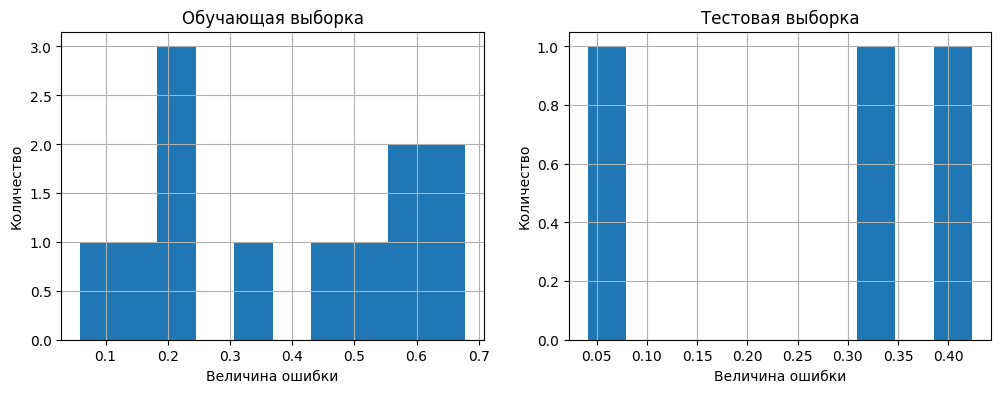

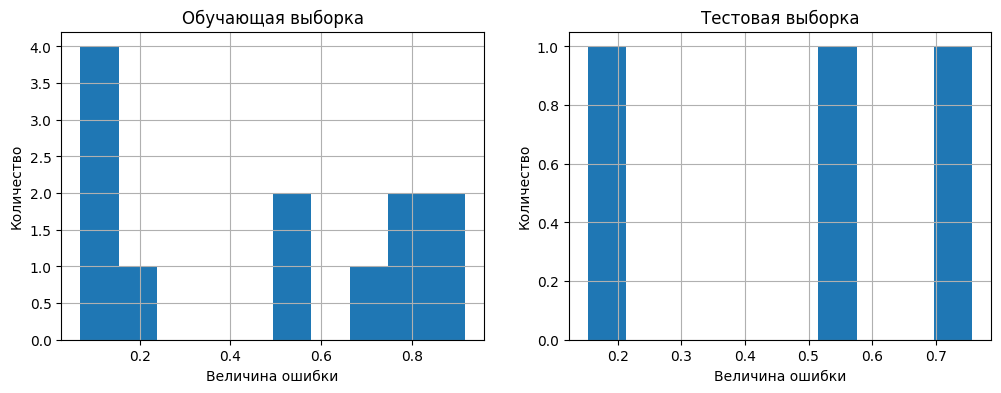

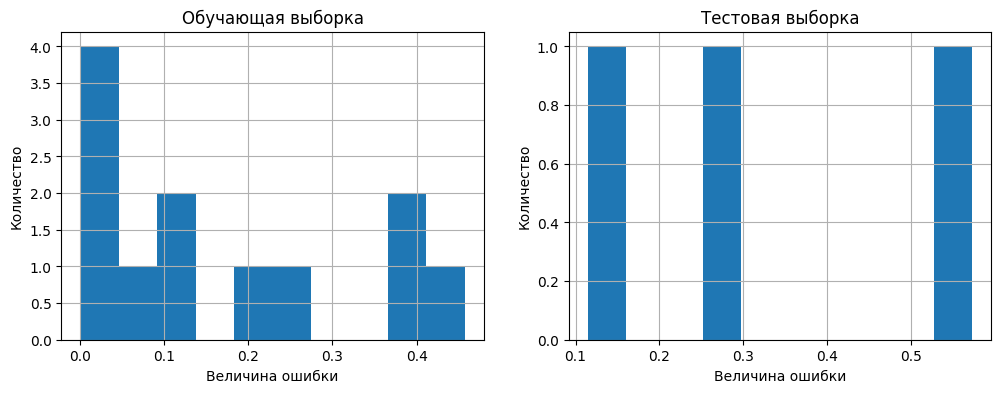

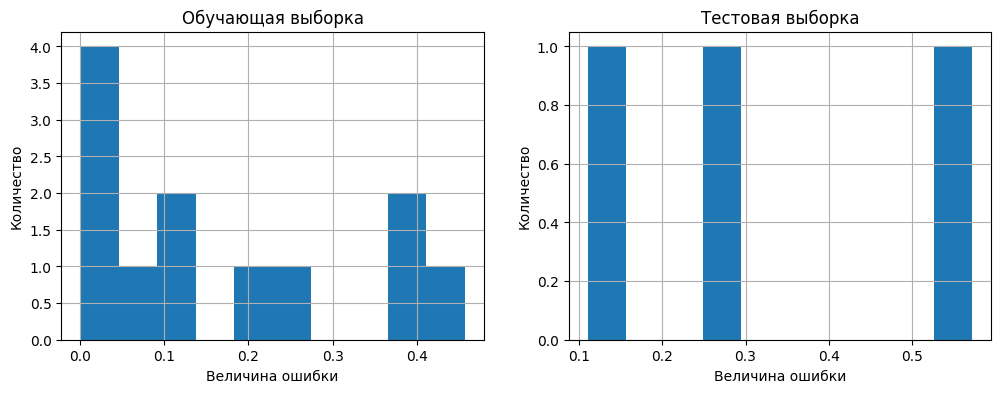

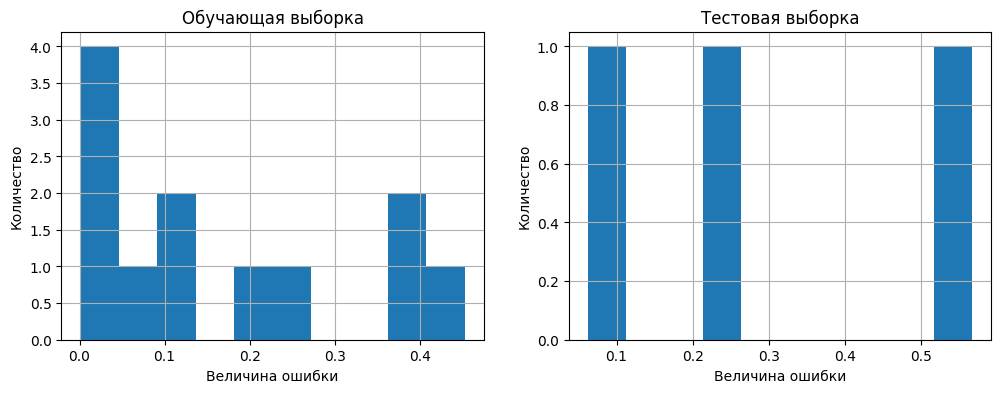

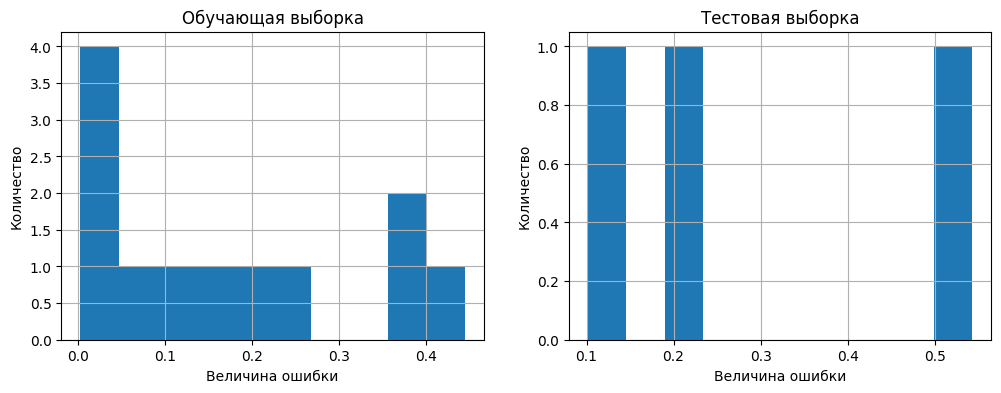

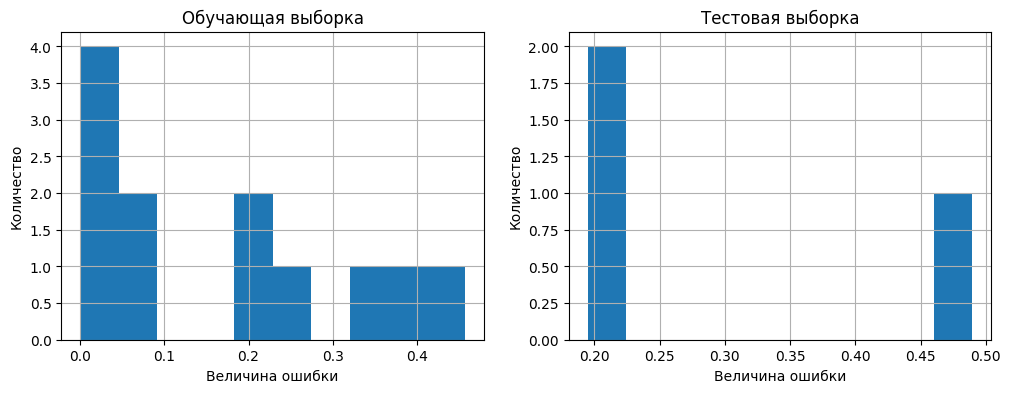

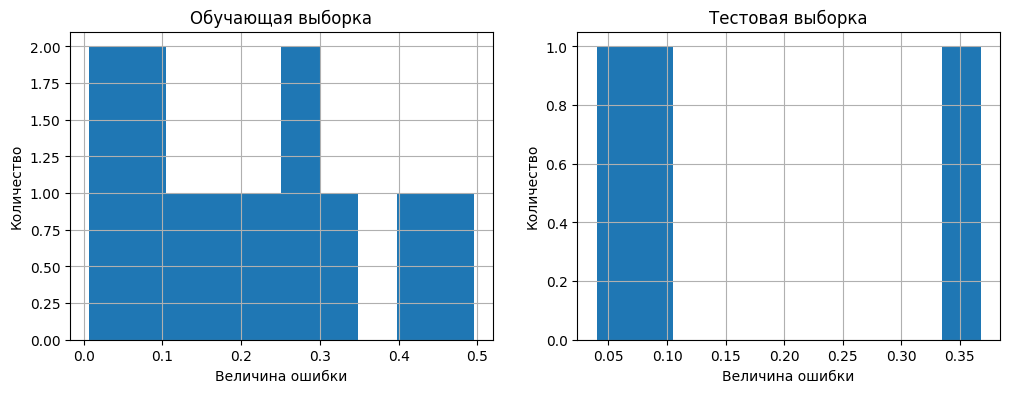

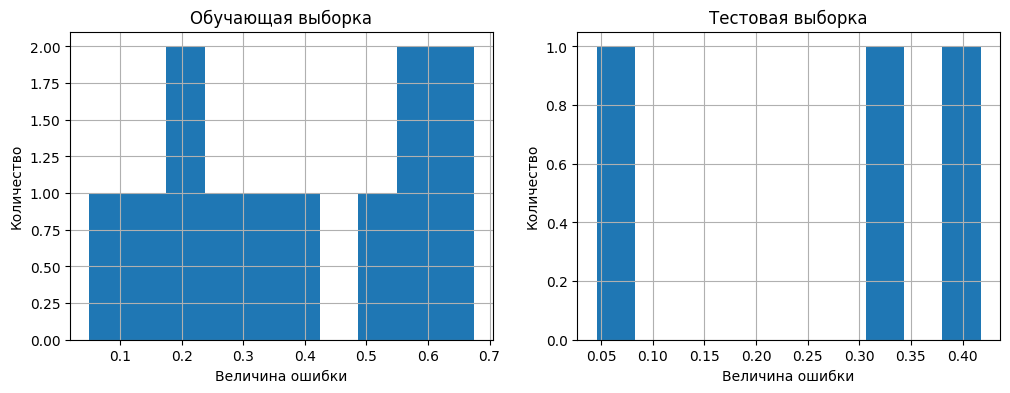

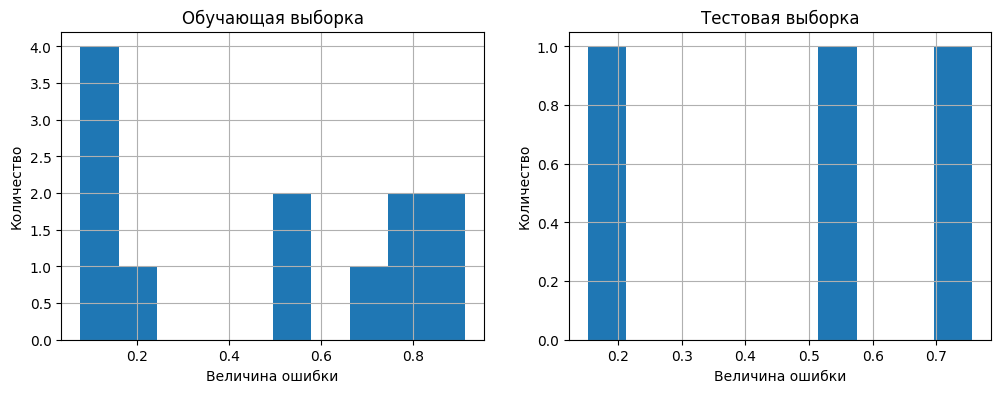

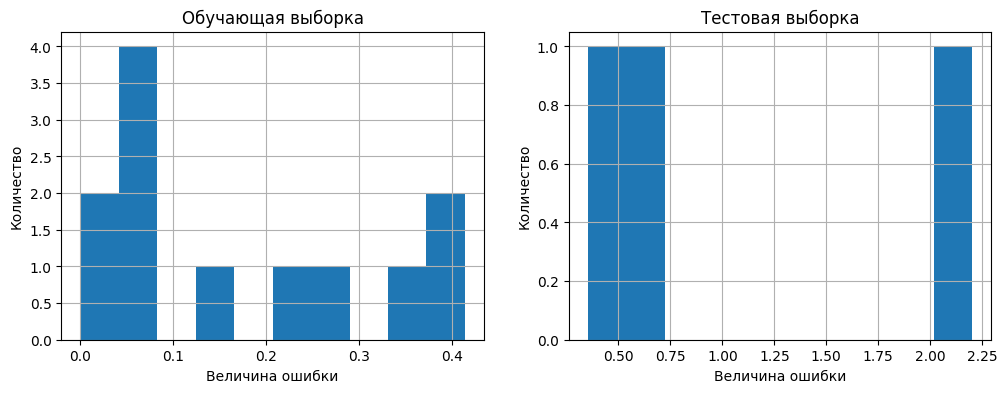

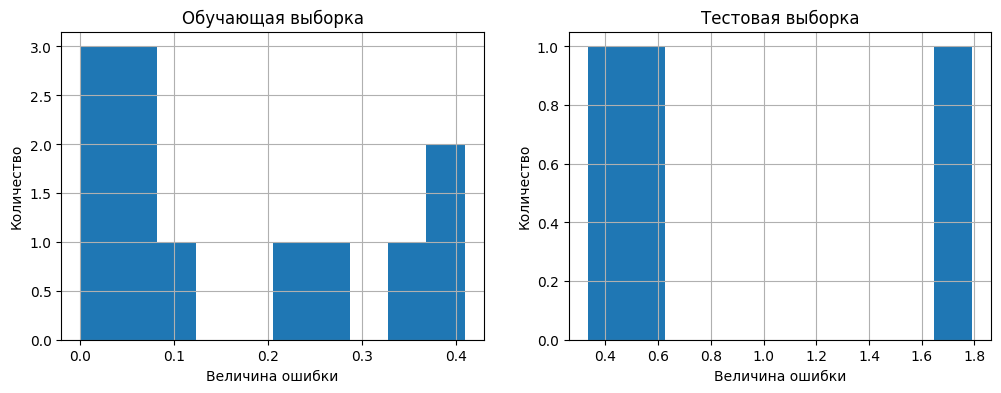

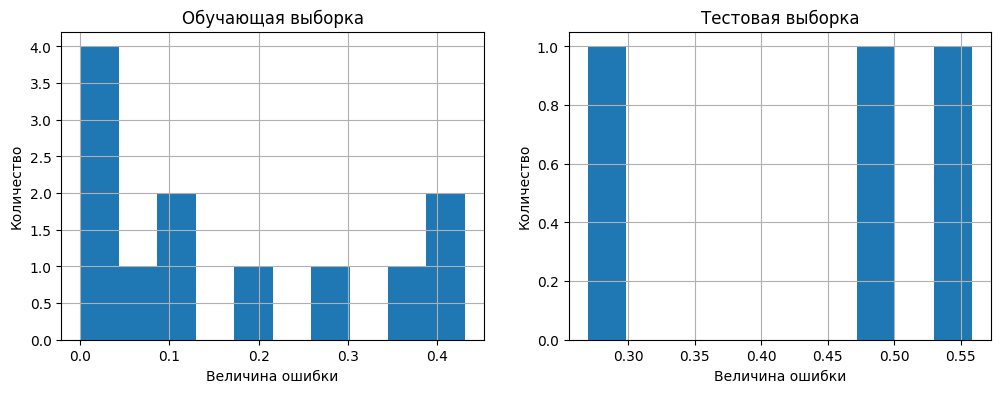

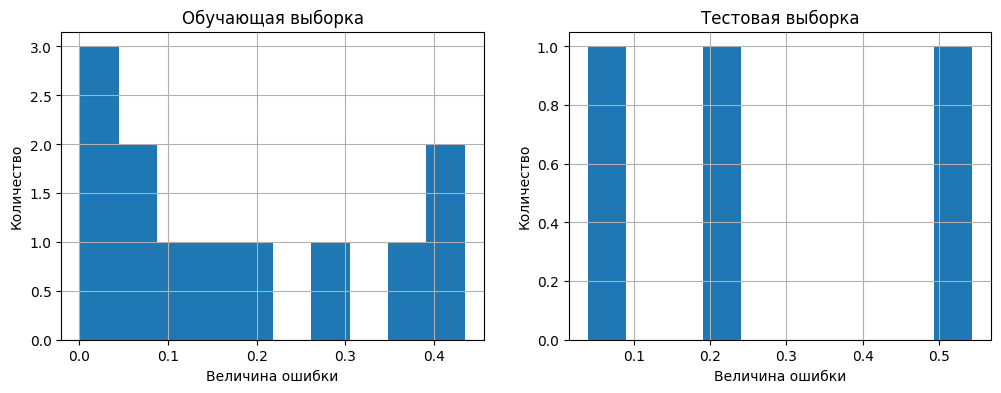

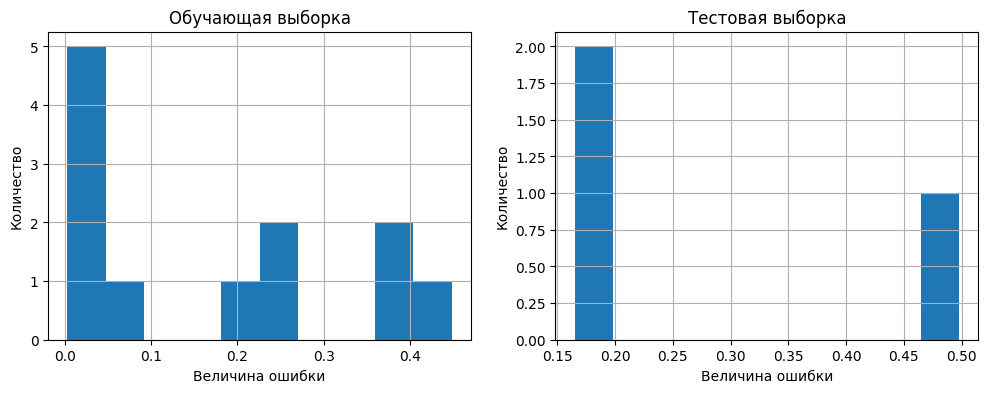

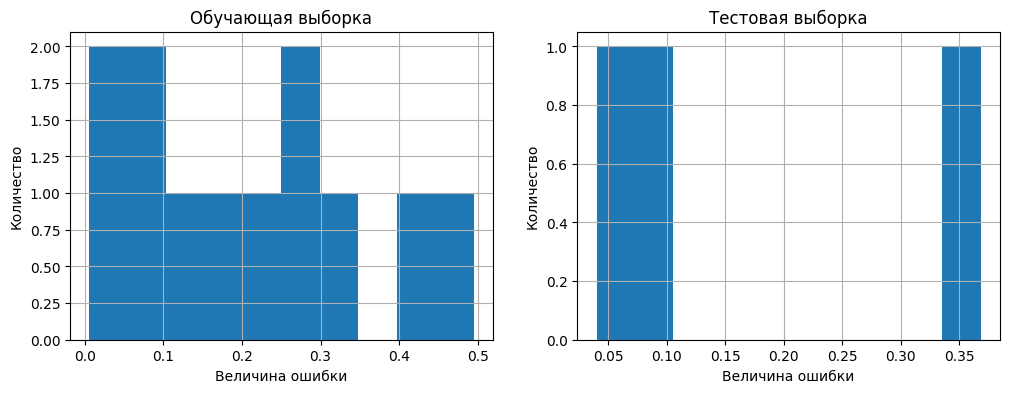

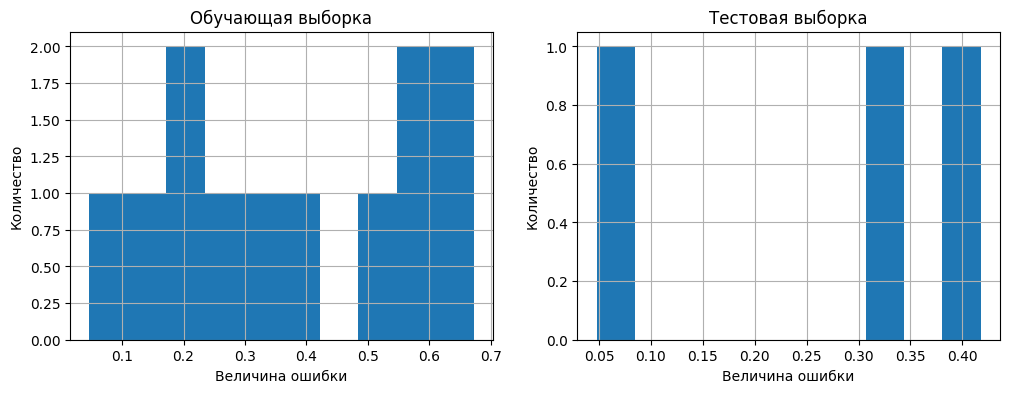

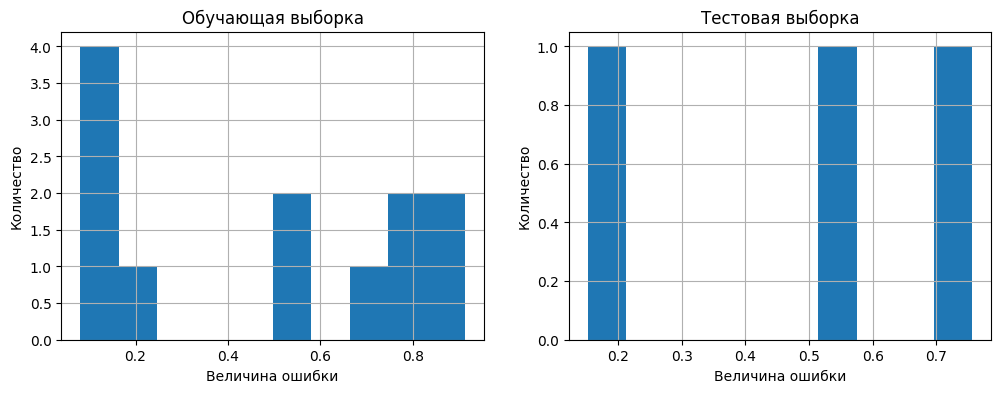

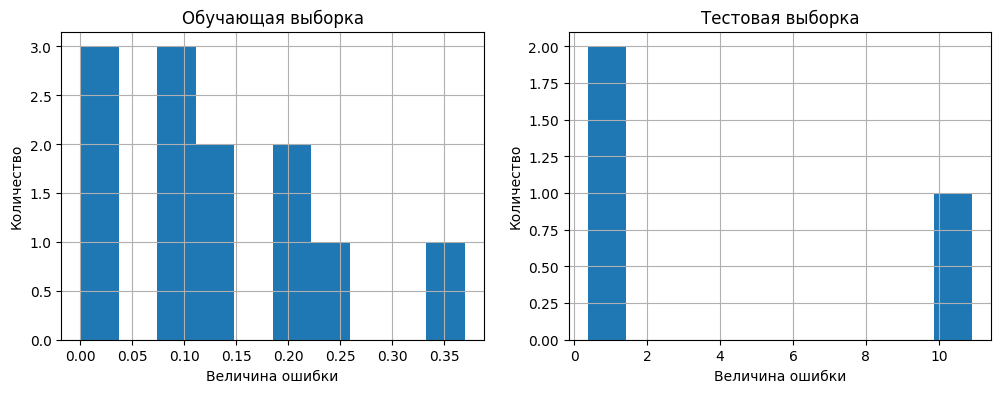

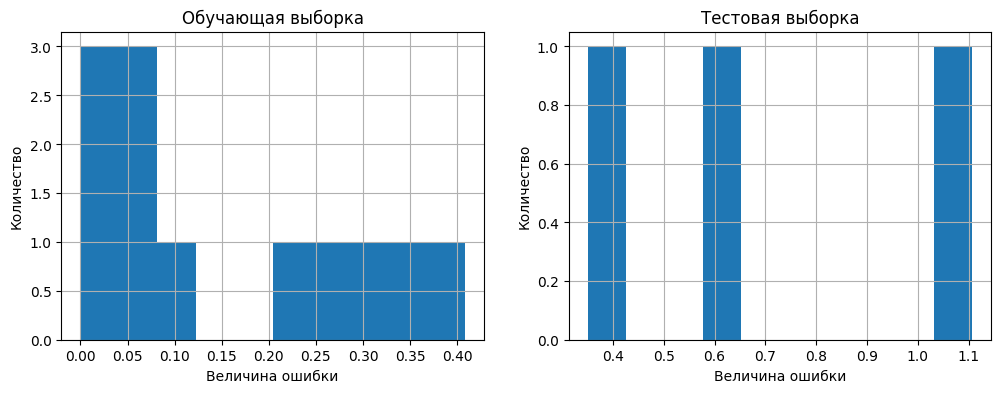

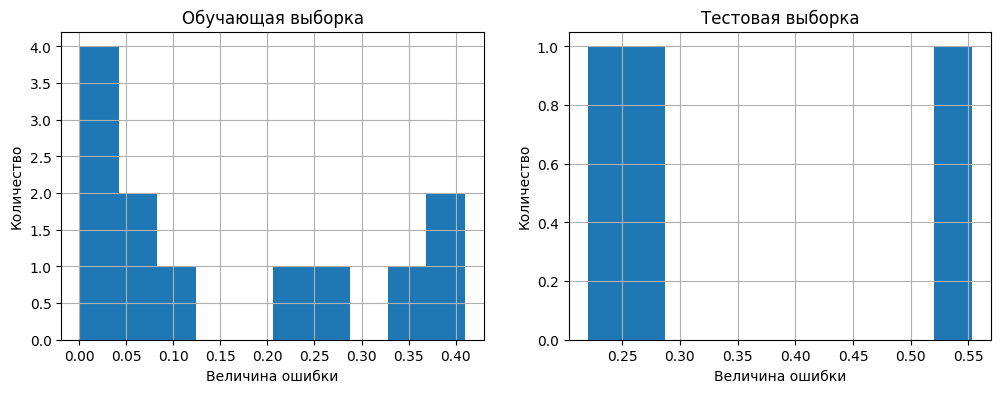

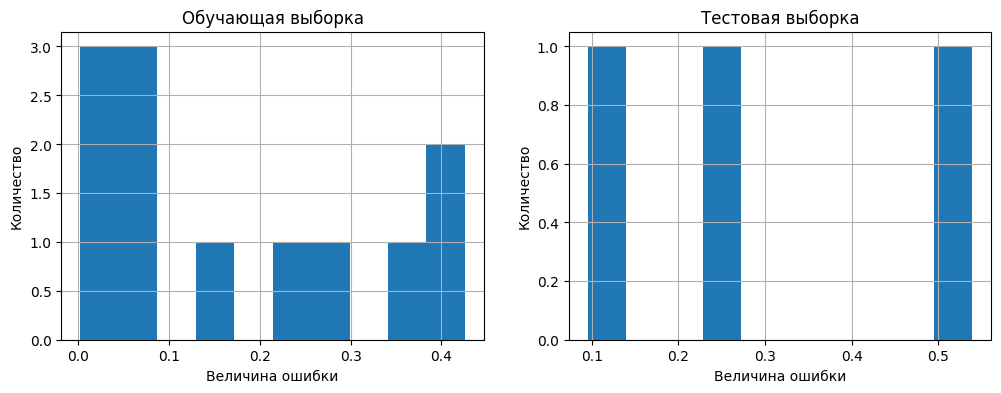

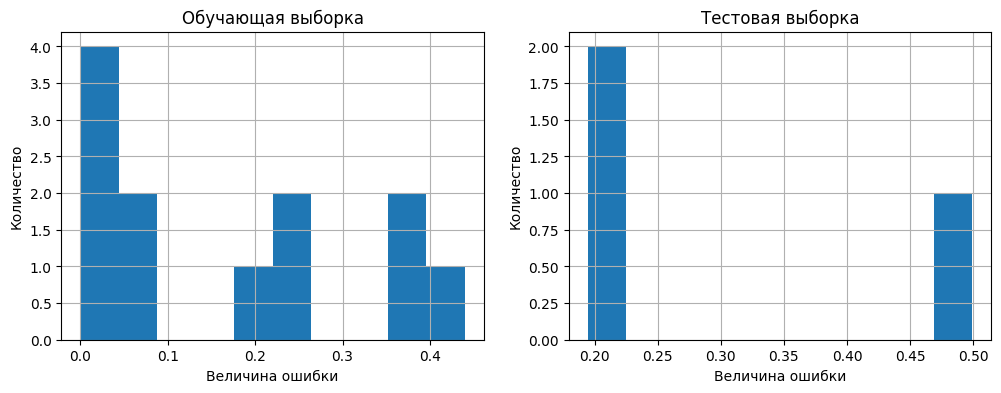

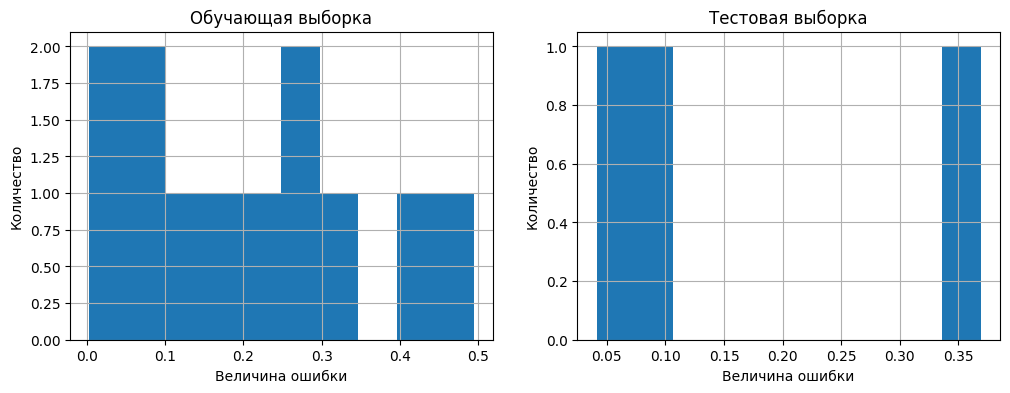

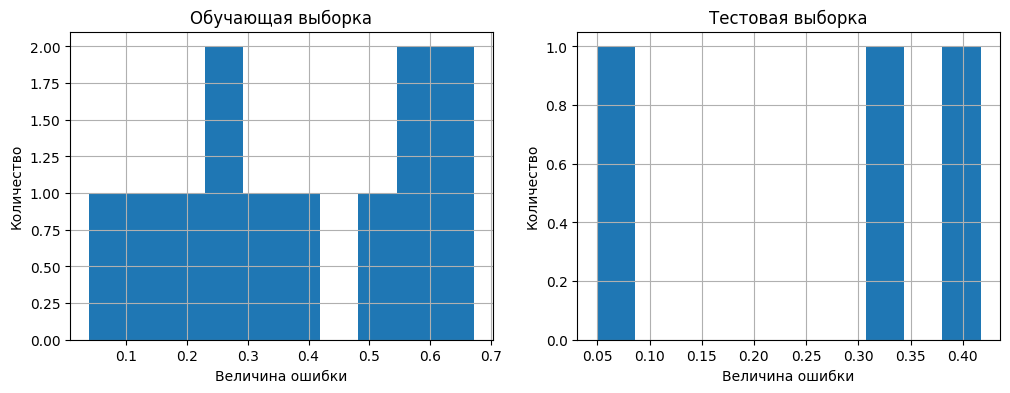

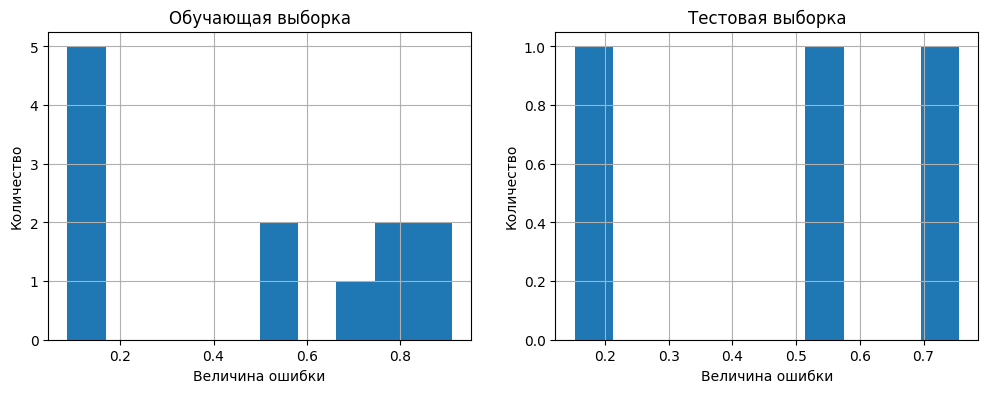

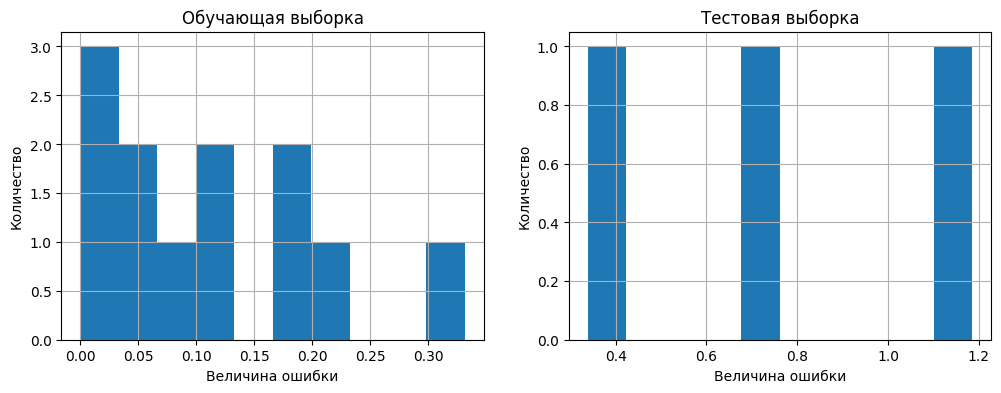

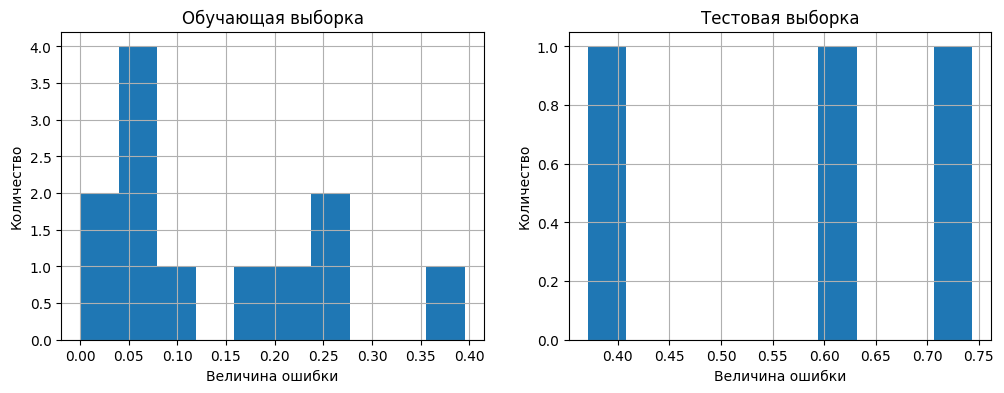

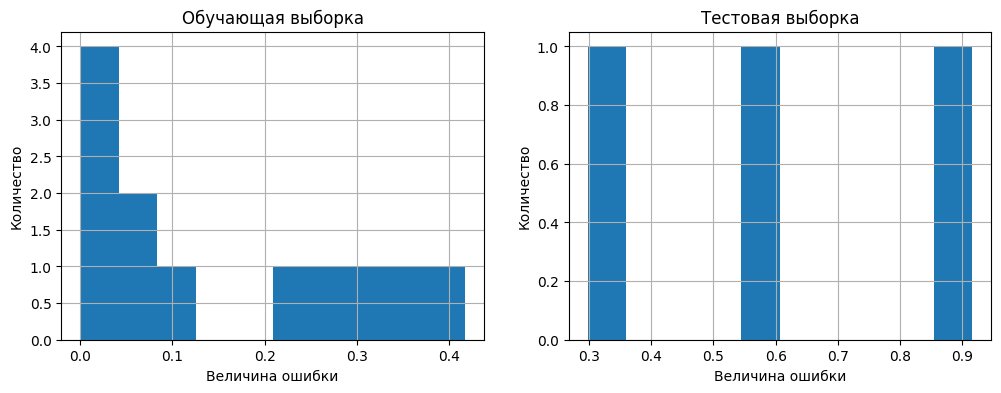

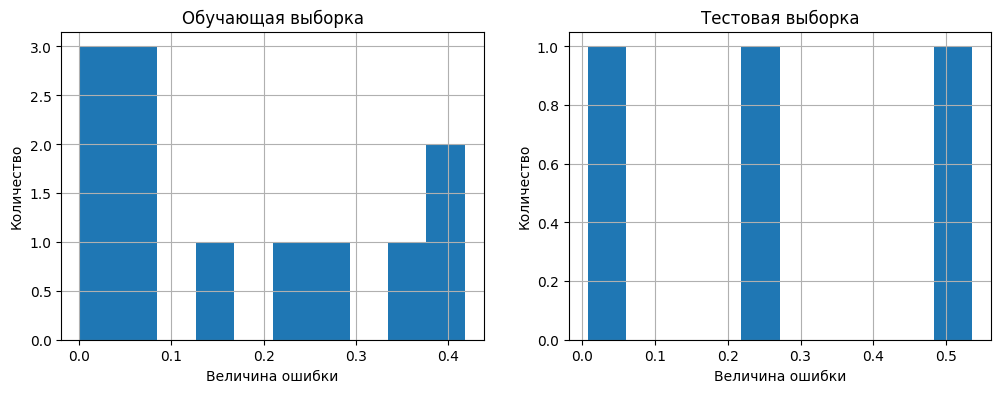

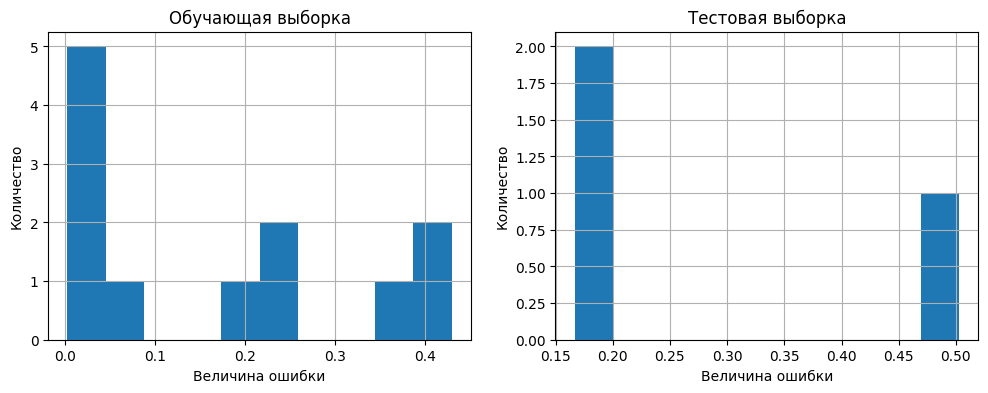

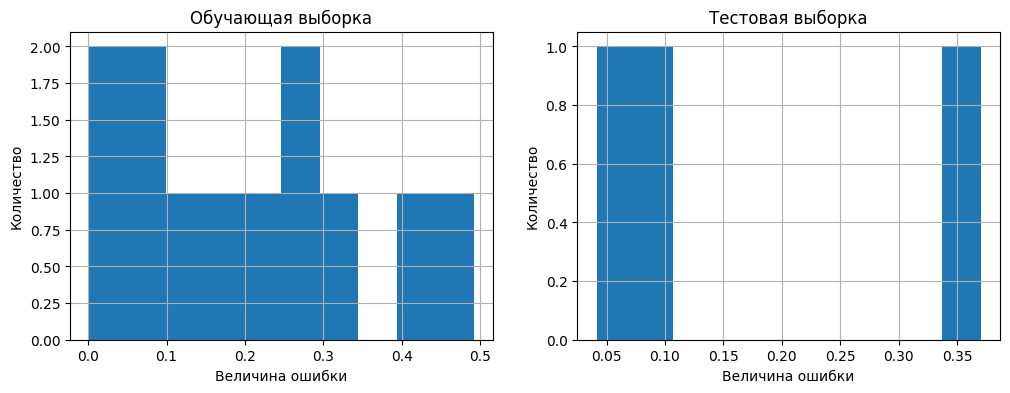

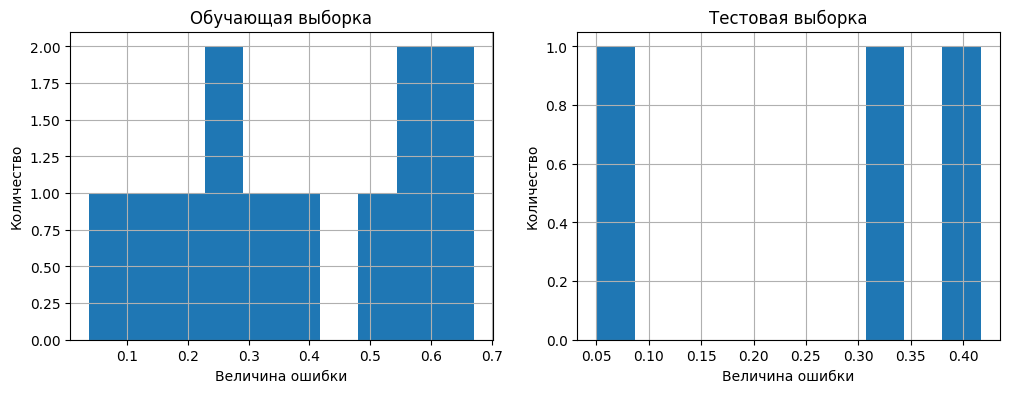

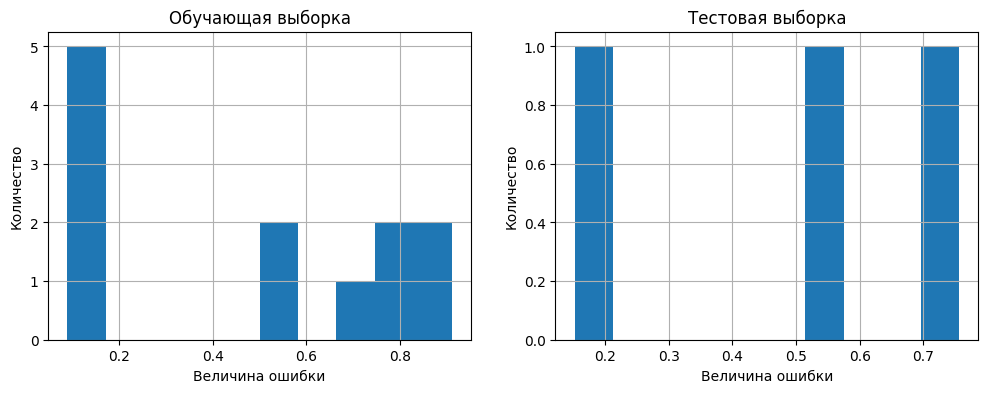

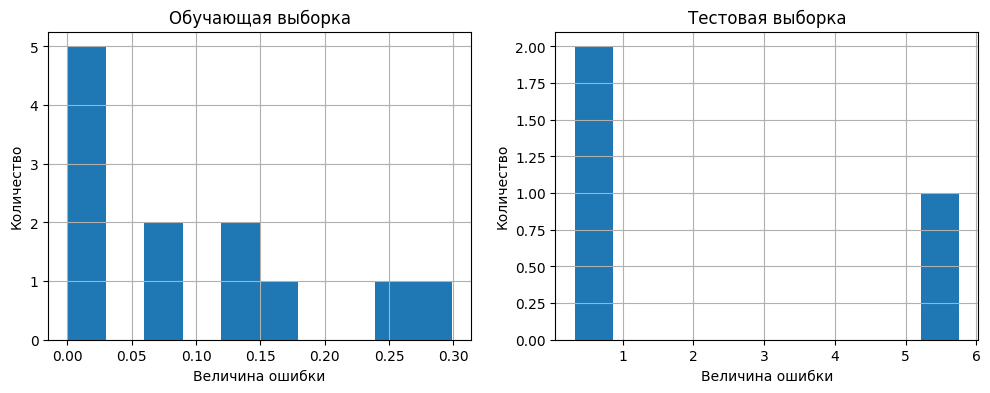

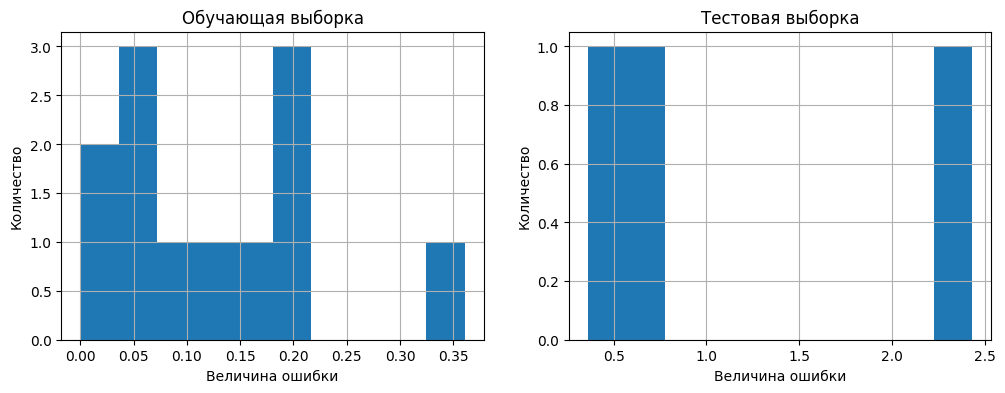

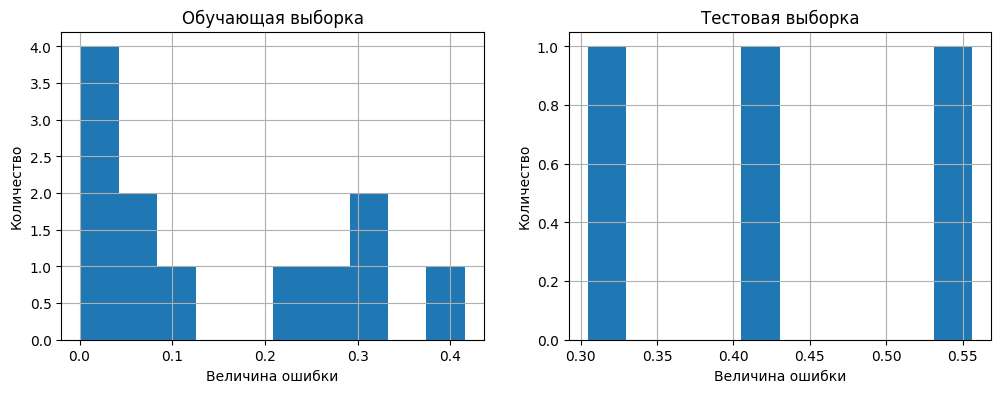

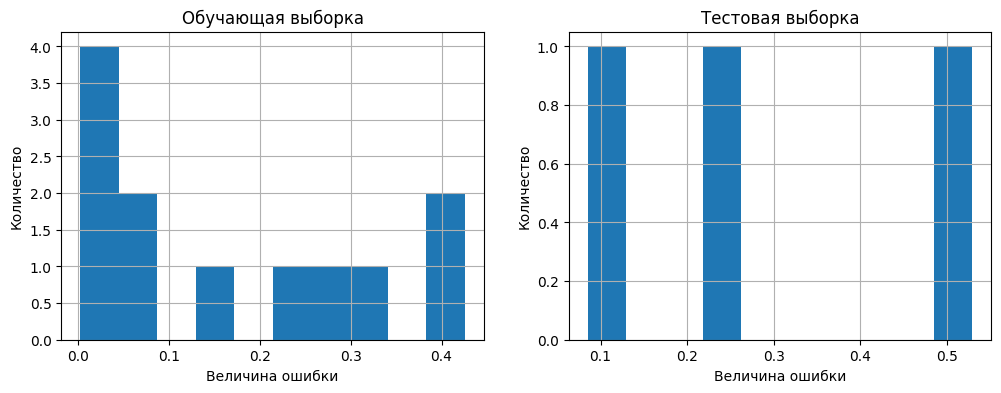

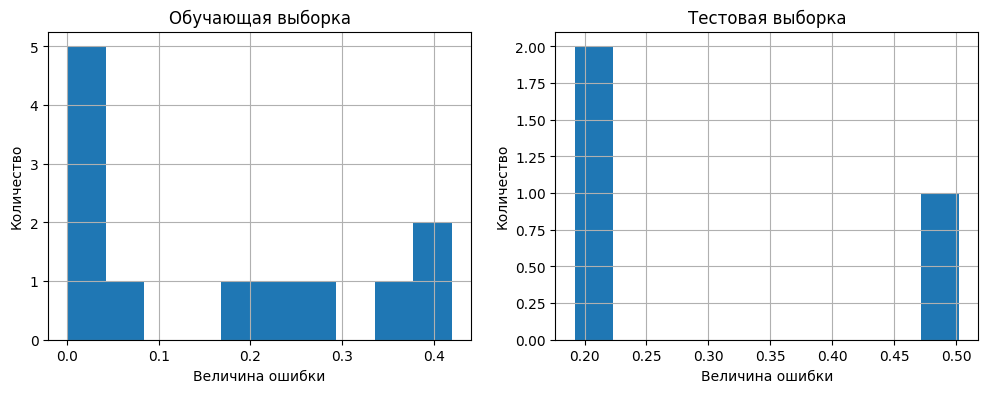

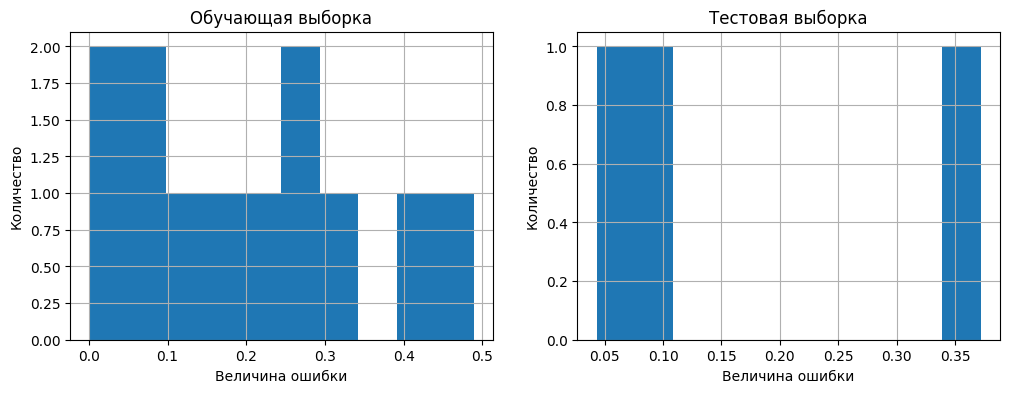

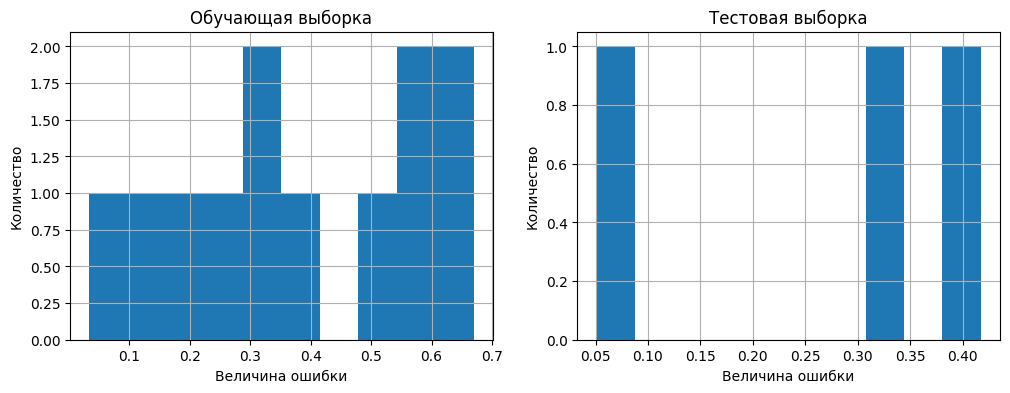

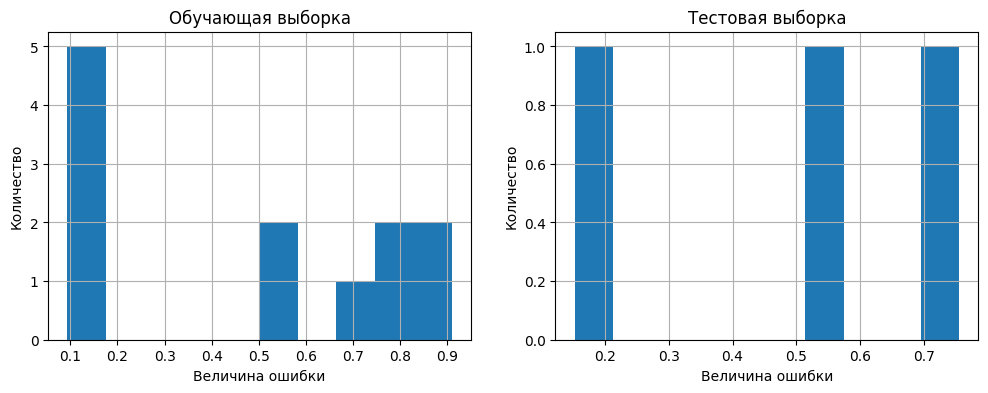

In [275]:
powers = np.arange(2, 10)
alphas = np.logspace(-6, 2, 8)
err = np.zeros((len(powers), len(alphas)))
errt = err.copy()
regr = []
for i, p in enumerate(powers):
    for j, a in enumerate(alphas):
        regressor = PolyDecorator(LeastSquareMod, p, x_train, y_train, a)
        err[i][j] = sk.metrics.mean_squared_error(y_train, regressor(x_train))
        errt[i][j] = sk.metrics.mean_squared_error(y_test, regressor(x_test))
        regr.append(regressor)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(2*7, 4))
im0 = ax0.imshow(np.log10(err), cmap='viridis', aspect='auto')
ax0.set(xlabel='$\log_{10}(\lambda)$', ylabel='Порядок полинома', title='Логарифм ошибки на обучающей выборке')
ax0.set(xticks=range(len(alphas)), xticklabels=np.log10(alphas).round(decimals=1))
ax0.set(yticks=range(len(powers)), yticklabels=powers)
fig.colorbar(im0, ax=ax0)

im1 = ax1.imshow(np.log10(errt), cmap='viridis', aspect='auto')
ax1.set(xlabel='$\log_{10}(\lambda)$', ylabel='Порядок полинома', title='Логарифм ошибки на тестовой выборке')
ax1.set(xticks=range(len(alphas)), xticklabels=np.log10(alphas).round(decimals=1))
ax1.set(yticks=range(len(powers)), yticklabels=powers)
fig.colorbar(im1, ax=ax1)


for i, p in enumerate(powers):
    for j, a in enumerate(alphas):
        
        k = i * len(powers) + j

        fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(2*6, 4))

        ax0.hist(abs(regr[k](x_train) - y_train)) # ax0.hist(???)
        ax0.set(xlabel='Величина ошибки', ylabel='Количество', title='Обучающая выборка')
        ax1.hist(abs(regr[k](x_test) - y_test))
        ax1.set(xlabel='Величина ошибки', ylabel='Количество', title='Тестовая выборка')

        print('Порядок: ', p, ', параметр alpha:', a, ', ошибка на обучающей выборке:', sk.metrics.mean_squared_error(y_train, regr[k](x_train))) 
        print('Порядок: ', p, ', параметр alpha:', a, ', ошибка на тестовой выборке:', sk.metrics.mean_squared_error(y_test, regr[k](x_test)), '\n')

**Вопросы**:

1. Какая модель (с регуляризацией или без) даёт лучшие результаты?
1. Получилось ли достичь лучших результатов при меньшем порядке полинома? 
1. Наблюдалось ли переобучение модели, и было ли оно устранено введением регуляризации?

**Ответы:**

1. С регуляцией.
2. Нет, с регуляцией лучший результат достагался при примерно при 5-ой степени:
   
   Порядок:  5 , параметр alpha: 0.5179474679231202 , ошибка на обучающей выборке: 0.06788819491612492

    Порядок:  5 , параметр alpha: 0.5179474679231202 , ошибка на тестовой выборке: 0.04786806481868796 
3. Да, наблюдалось. Можно устранить, если верно подобрать степень полинома и параметр регуляции. Например:
   
   Порядок:  4 , параметр alpha: 7.196856730011514 , ошибка на обучающей выборке: 0.18787936415776688

   Порядок:  4 , параметр alpha: 7.196856730011514 , ошибка на тестовой выборке: 0.09749152760670492 
